## 1. 서론

In [ ]:

# 자동 추가: 누락된 변수 및 import 보완
from scipy.stats import shapiro, levene
# 음수 레슨 시간 제거
drop_the_minus_user = user_act_final[user_act_final['lesson_dur_min'] >= 0]
drop_the_minus_user_day0 = drop_the_minus_user[drop_the_minus_user['is_day1'] == 0]
drop_the_minus_user_day1 = drop_the_minus_user[drop_the_minus_user['is_day1'] == 1]
# complete_lesson_df_b 정의
complete_lesson_df_b = complete_lesson[~complete_lesson['user_id'].isin(user_list_set)]
# lesson_start_new 정의
lesson_start_new = df_lesson_start.copy()


### 1.1 분석 배경 및 목적

온라인 교육 콘텐츠 시장은 디지털 전환 가속화, 학습 주체의 자율성 확대, 그리고 시·공간 제약 없는 학습 환경 제공을 통해 매년 급격한 성장세를 기록하고 있다. 특히 코로나19 팬데믹을 계기로 오프라인 강의가 비대면 콘텐츠로 대거 전환되면서, 개별 학습자의 요구에 최적화된 맞춤형 강의 제공 및 학습 효과 측정에 대한 수요가 더욱 증대되었다. 본 분석의 목적은 서비스 이용자의 행동 패턴을 정밀히 진단하여, 운영 중인 교육 상품의 강·약점을 객관적으로 파악하고, 데이터 기반 인사이트를 도출함으로써 비즈니스 가치를 극대화하는 데 있다.

연구 대상은 유저의 접속 및 학습 여정 전반에 걸친 로그 데이터로서, 메인페이지 진입, 회원가입, 강의 페이지 방문, 수강 시작·완료, 후기 확인 등 주요 접점이 포함된다. 특히 콘텐츠 난이도별 수강 전환율, 레슨별 이탈 구간, 무료 체험 유입 후 유료 전환 시점 등 핵심 지표를 중심으로 유저 행동을 세분화하여 분석한다. 이를 통해 ‘어떤 유형의 사용자’가 ‘어떤 경로로’ 서비스를 이용하며, ‘어느 시점에’ 이탈 또는 결제로 이어지는지를 체계적으로 규명할 것이다.

이어서, 분석 결과를 토대로 구체적인 서비스 개선 방안을 제시한다. 예컨대 특정 난이도 구간에서 이탈률이 과도하게 발생할 경우, 레슨 구성 및 난이도 재조정 또는 보조 학습 자료 제공 여부를 검토하고, 무료 체험 후 유료 전환율 제고를 위해 체험 기간 중 핵심 가치 제안 강화 및 타깃별 맞춤 프로모션 설계 방안을 모색한다. 마지막으로 제안된 개선 과제에 대한 우선순위를 설정하고, 이후 A/B 테스트 및 전환율 모니터링 계획을 포함한 실행 로드맵을 제안함으로써 실질적 개선 성과를 확보하고자 한다.

## 2. 목표 설정 및 가설 정의


### 2.1 주제

아하 모먼트(A-ha Moment)를 경험한 뒤 첫날(이하 Day 0)에 이탈한 사용자(이하 Day 0 유저)를, 다음 날(이하 Day 1)에 재방문하도록 유도하기 위한 개입 전략 제안

### 2.2 목표

1. Day 0 이탈 유저 재방문 전환율 제고

    - A-ha Moment를 경험한 직후 서비스 이탈한 사용자를 대상으로, Day 1 재방문을 얼마나 효과적으로 유도할 수 있는지 측정

2. 세그먼트별 리텐션 차별화 진단

    - Day 1 재방문을 달성한 사용자 세그먼트와 그렇지 않은 세그먼트 간 후속 리텐션 차이를 비교

3. 개입 전략 우선순위 설정 근거 마련

    - 어떤 메시지, 채널(푸시, 이메일, 인앱), 타이밍이 가장 효과적인지 A/B 테스트 설계를 위한 사전 가설 도출

### 2.3 실험 가설

가설: A-ha Moment를 경험한 Day 0 유저 중 Day 1에 재방문한 세그먼트(Day 1 재방문 유저)는, 재방문하지 않은 유저 대비 리텐션이 유의미하게 높을 것이다.

### 2.4 AARRR 프레임 워크 정의

| 구분 | 지표 | 설명 | 비고 |
| --- | --- | --- | --- |
| Acquisition | 2022년 이후 가입 유저 수 | 실험 대상 풀 정의 | 가입 발생 시점을 기준으로 추출 |
| Activation (A-ha Moment) | 최소 1개 레슨 시작(`start.content`) | ‘가치 체험’ 최초 시점 측정 | `start.content` 이벤트 발생 |
| Retention | Day 1 재방문율 (2022년 이후 Activation 기준) | Activation 다음 날에 서비스 접속 비율 | `client_event_time` 기준 |


1. Acquisition
    - 정의: 2022년 1월 1일 이후 가입하여 Activation 조건을 충족한 모든 신규 유저

2. Activation (A-ha Moment)
    - 조건: 1 Acquisition : 22년 11월 1일 이후 회원가입 (complete_signup)

2. Activation : D+0 레슨을 1개라도 수강 (enter.lesson_page)한 사람

    - 의미: 해당 이벤트 발생 시점을 A-ha Moment (가치 체험)으로 간주

3. Retention – Day 1 재방문율
    - 측정 방법: D+1 재방문하여 어떤 행동이라도 한사람

## 3. 분석 환경 준비

### 3.1 분석 환경 설정

In [4]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
os.chdir('C:/Users/Yoo/Desktop/주제 2. 구독서비스 프로덕트 데이터 분석/Data')


### 3.2 데이터 정의

온라인 교육 콘텐츠 구독서비스의 2년 기간의 (2022.01.01 - 2023.12.31) 온라인 서비스 유저 행동 데이터

- 데이터 정의서

| 구분 | 이벤트 키 | 설명 | 주요 파라미터 | 비고 |
| --- | --- | --- | --- | --- |
| 가입 | enter.main_page | 서비스 메인페이지 진입 |  |  |
| 가입 | enter.signup_page | 회원가입 페이지 진입 |  |  |
| 가입 | complete.signup | 회원가입 완료 | 로그인 방식 |  |
| 수강 | click.content_page_start_content_button | 콘텐츠 수강하기 버튼 클릭 | 콘텐츠 id, 버튼 이름 |  |
| 수강 | click.content_page_more_review_button | 콘텐츠 후기 더보기 버튼 클릭 | 콘텐츠 id |  |
| 수강 | start.content | 콘텐츠 수강 시작 | 콘텐츠 id, 콘텐츠 이용가, 콘텐츠 난이도 | 22년 8월부터 수집된 테이블입니다. |
| 수강 | enter.lesson_page | 레슨 시작 | 콘텐츠 id, 레슨 id, 무료체험 여부 | 콘텐츠는 여러 개의 레슨으로 구성되어 있습니다. |
| 수강 | complete.lesson | 레슨 완료 | 콘텐츠 id, 레슨 id |  |
| 수강 | click_lesson_page_related_question_box | 레슨 페이지 내 질문 목록 클릭 | 콘텐츠 id, 레슨 id, 댓글 id |  |
| 수강 | end.content | 콘텐츠 수강 완료 | 콘텐츠 id | 콘텐츠 내 모든 레슨을 시청하면 로그가 쌓임 |
| 수강 | enter.content_page | 콘텐츠 개별 페이지 진입 | 콘텐츠 id |  |
| 구독 및 결제 | enter.payment_page | 결제 페이지 진입 |  |  |
| 구독 및 결제 | complete.subscription | 첫 결제 완료 | 정상가, 할인가, 할인액, 결제수단 타입 | 첫 결제가 중복이면 환불 후 재결제한 케이스로 간주 |
| 구독 및 결제 | renew.subscription | 정기 결제 완료 | 정상가, 할인가, 할인액, 결제수단 타입 |  |
| 구독 및 결제 | resubscribe.subscription | 만료 후 재구독 완료 |  |  |
| 구독 및 결제 | start.free_trial | 서비스 무료체험 시작 | 콘텐츠 id, 요금제 종류, 정상가 |  |
| 구독 및 결제 | click.cancel_plan_button | 구독 취소 버튼 클릭 |  | 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주 |

- 공통 컬럼

| 필드 | 설명 | 데이터 타입 | 비고 |
| --- | --- | --- | --- |
| city | 접속 위치 | Object | 국내 기준 “시” 단위로 제공하나, 서울의 경우 “구”가 특정이 되는 경우는 “구” 단위로 표기 |
| client_event_time | 타임스탬프 | Object | UTC +0 기준 타임스탬프 |
| country | 접속 국가 | Object |  |
| device_carrier | 사용 이동통신사 | float64 |  |
| device_family | 사용 기기 유형 | Object |  |
| device_type | 사용 기기 | Object |  |
| event_type | 이벤트 유형 | Object | 테이블명과 일치 |
| language | 사용자 설정 언어 | Object |  |
| os_name | 사용 브라우저 이름 | Object |  |
| os_version | 사용 브라우저 버전 | Object |  |
| platform | 사용 플랫폼 | Object |  |
| user_id | 유저 id | Object |  |

- 고유 컬럼

| 이벤트 키 | 설명 | 주요 파라미터 (변수명: 타입) | 비고 |
| --- | --- | --- | --- |
| enter.main_page | 서비스 메인페이지 진입 | – | – |
| enter.signup_page | 회원가입 페이지 진입 | – | – |
| complete.signup | 회원가입 완료 | type: object | 로그인 방식 |
| enter.content_page | 콘텐츠 개별 페이지 진입 | content.id: object | 콘텐츠 ID |
| click.content_page_start_content_button | 콘텐츠 수강하기 버튼 클릭 | content.id: object, button_name: object<br>button.name: object | `button_name`(페이지 개편 전) / `button.name`(페이지 개편 후) |
| click.content_page_more_review_button | 콘텐츠 후기 더보기 버튼 클릭 | content.id: object | 콘텐츠 ID |
| enter.payment_page | 결제 페이지 진입 | – | – |
| complete.subscription | 첫 결제 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | `coupon.discount_amount` = 정상가 − 실제 결제 금액<br>`pg.type` A / B / C = 각기 다른 간편결제 수단 |
| renew.subscription | 정기 결제 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | (위와 동일) |
| resubscribe.subscription | 만료 후 재구독 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | (위와 동일) |
| start.free_trial | 서비스 무료체험 시작 | plan.price: int64, plan.type: object | **plan.type** : 1 개월 / 12 개월 요금제 선택<br>모든 요금제는 7일 무료체험 가능 (결제수단 등록 필요)<br>7일 이내 해지하지 않으면 자동 결제 |
| start.content | 콘텐츠 수강 시작 | content.id: object, content.difficulty: int64 | – |
| enter.lesson_page | 레슨 시작 | content.id: object, lesson.id: object,<br>is_free_trial: boolean, is_trial: boolean | `is_trial` = 무료 레슨이면서 **비구독자** 여부 |
| complete.lesson | 레슨 완료 | content.id: object, lesson.id: object | – |
| click_lesson_page_related_question_box | 레슨 페이지 내 질문 목록 클릭 | content.id: object, lesson.id: object,<br>question.id: object | – |
| end.content | 콘텐츠 수강 완료 | content.id: object | 콘텐츠 내 모든 레슨 시청 시 기록 |
| click.cancel_plan_button | 구독 취소 버튼 클릭 | – | 구독 취소로 간주 |


## 4. 데이터 전처리

In [ ]:
import glob

# 현재 디렉토리의 모든 파일 목록 확인
all_files = os.listdir('.')
print("전체 파일 리스트:", all_files)

dataframes = {}

for file in all_files:
    if file.endswith('.csv'):
        try:
            df = pd.read_csv(file)
            dataframes[file] = df
            print(f"[CSV] {file} 읽기 완료, shape: {df.shape}")
        except Exception as e:
            print(f"[CSV] {file} 읽기 실패: {e}")
    elif file.endswith('.xlsx') or file.endswith('.xls'):
        try:
            df = pd.read_excel(file)
            dataframes[file] = df
            print(f"[Excel] {file} 읽기 완료, shape: {df.shape}")
        except Exception as e:
            print(f"[Excel] {file} 읽기 실패: {e}")
    else:
        print(f"파일 스킵: {file}")

# dataframes 딕셔너리에는 파일명별 DataFrame이 저장됩니다.
dataframes

In [ ]:
# 사용할 로그 데이터 불러오기

click_content_page_start_content_button = dataframes['click.content_page_start_content_button.csv']
complete_lesson = dataframes['complete.lesson.csv']
complete_signup = dataframes['complete.signup.csv']
complete_subscription = dataframes['complete.subscription.csv']
enter_lesson = dataframes['enter.lesson_page.csv']
renew_subscription = dataframes['renew.subscription.csv']
resubscribe_subscription = dataframes['resubscribe.subscription.csv']
start_content = dataframes['start.content.csv']
start_free_trial = dataframes['start.free_trial.csv']
enter_main_page = dataframes['enter.main_page.csv']
start_content_click = dataframes['click.content_page_start_content_button.csv']
content_review = dataframes['click.content_page_more_review_button.csv']
question_box = dataframes['click.lesson_page_related_question_box.csv']
enter_content_page = dataframes['enter.content_page.csv']
click_cancel = dataframes['click.cancel_plan_button.csv']

In [ ]:
complete_signup_a = complete_signup[
    (complete_signup['country'].isna()) | 
    (complete_signup['country'] == 'South Korea')
    ]

start_date = pd.to_datetime('2022-11-01')
complete_signup_a['client_event_time'] = pd.to_datetime(complete_signup_a['client_event_time'])
complete_signup_a = complete_signup_a[complete_signup_a['client_event_time'].dt.date >= start_date.date()]

# 유저 리스트  - 22년 11월 이후 가입자자
user_list_set = set(complete_signup_a['user_id'].unique())
len(user_list_set)

lesson_start = enter_lesson[enter_lesson['user_id'].isin(user_list_set)].drop_duplicates()

# 필요한 컬럼만 선택
lesson_start_a = lesson_start[['user_id', 'client_event_time']].copy()

# source 컬럼으로 event_type 저장
lesson_start_a['source'] = 'lesson_start'

# aha_moment = 레슨 첫 수강일 
# aha_day로 저장 
# 22-11-01 ~ 23-12-31 
lesson_start_a['client_event_time'] = pd.to_datetime(lesson_start_a['client_event_time'])
lesson_start_a['aha_day'] = (
    lesson_start_a.groupby('user_id')['client_event_time']
    .transform('min')
    .dt.date
)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\1655430693.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 유저 리스트  - 22년 11월 이후 가입자
user_list_set = set(lesson_start_a['user_id'].unique())
len(user_list_set)

# 서비스 메인 페이지 진입
# 총 75365 명 -> 14527 명
# 총 2133548 행 -> 59332 행
enter_main_page_a = enter_main_page[enter_main_page['user_id'].isin(user_list_set)]

enter_main_page_a['client_event_time'] = pd.to_datetime(enter_main_page_a['client_event_time'])
print(enter_main_page_a['client_event_time'].min())
print(enter_main_page_a['client_event_time'].max())

# 필요한 컬럼만 선택
enter_main_page_a = enter_main_page_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
enter_main_page_a['source'] = 'main_entry'

2022-11-01 01:35:22.462000
2023-12-10 14:59:00.268000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\180634607.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 레슨 완료
# 49683명 -> 24325명
# 5405069행 -> 1538882행
complete_lesson_a = complete_lesson[complete_lesson['user_id'].isin(user_list_set)]

complete_lesson_a['client_event_time'] = pd.to_datetime(complete_lesson_a['client_event_time'])
print(complete_lesson_a['client_event_time'].min())
print(complete_lesson_a['client_event_time'].max())

# 필요한 컬럼만 선택
complete_lesson_a = complete_lesson_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
complete_lesson_a['source'] = 'content_start'

2022-11-01 04:17:58.308000
2023-12-31 23:56:52.291000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\1359838410.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 콘텐츠 수강하기 버튼 클릭
# 35110명 -> 13551명
# 172911행 -> 40619
start_content_click_a = start_content_click[start_content_click['user_id'].isin(user_list_set)]
start_content_click_a['source'] = 'content_start_button'

# 콘텐츠 후기 더보기 버튼 클릭
# 3195명 -> 855명
# 93962행 -> 1175 행
content_review_a = content_review[content_review['user_id'].isin(user_list_set)]

# 필요한 컬럼만 선택
content_review_a = content_review_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
content_review_a['source'] = 'content_review'

start_content_a = start_content[start_content['user_id'].isin(user_list_set)]
start_content_a['client_event_time'] = pd.to_datetime(start_content_a['client_event_time'])

# 필요한 컬럼만 선택
start_content_a = start_content_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
start_content_a['source'] = 'content_start'


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\21939484.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\21939484.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 레슨 페이지 내 질문 목록 클릭
# 40407명  -> 14408명
# 1379136행 -> 224038행
question_box_a = question_box[question_box['user_id'].isin(user_list_set)]

question_box_a['client_event_time'] = pd.to_datetime(question_box_a['client_event_time'])
print(question_box_a['client_event_time'].min())
print(question_box_a['client_event_time'].max())

# 필요한 컬럼만 선택
question_box_a = question_box_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
question_box_a['source'] = 'lesson_question'

2022-11-01 07:19:26.437000
2023-12-31 23:41:19.051000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\3449648064.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 콘텐츠 수강 완료
# 29236명 -> 10634명
# 120582행 -> 36065
end_content_a = end_content[end_content['user_id'].isin(user_list_set)]

end_content_a['client_event_time'] = pd.to_datetime(end_content_a['client_event_time'])
print(end_content_a['client_event_time'].min())
print(end_content_a['client_event_time'].max())

# 필요한 컬럼만 선택
end_content_a = end_content_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
end_content_a['source'] = 'complete_content'

2022-11-01 05:34:52.553000
2023-12-31 23:21:49.824000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\3125789036.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 콘텐츠 개별 페이지 진입
# 72706명 -> 27457명
# 1914257행 -> 391934
enter_content_page_a = enter_content_page[enter_content_page['user_id'].isin(user_list_set)]

enter_content_page_a['client_event_time'] = pd.to_datetime(enter_content_page_a['client_event_time'])
print(enter_content_page_a['client_event_time'].min())
print(enter_content_page_a['client_event_time'].max())

# 필요한 컬럼만 선택
enter_content_page_a = enter_content_page_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
enter_content_page_a['source'] = 'content_page'

2022-11-01 02:00:17.349000
2023-12-31 23:58:39.902000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\4005063261.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 첫 결제 완료
# 13881 명 -> 7600명
# 14289행 -> 7753행행
complete_subscription_a = complete_subscription[complete_subscription['user_id'].isin(user_list_set)]

complete_subscription_a['client_event_time'] = pd.to_datetime(complete_subscription_a['client_event_time'])
print(complete_subscription_a['client_event_time'].min())
print(complete_subscription_a['client_event_time'].max())

# 필요한 컬럼만 선택
complete_subscription_a = complete_subscription_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
complete_subscription_a['source'] = 'content_page'

2022-11-08 04:15:02.017000
2023-12-31 15:03:12.065000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\652731961.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 정기 결제 완료
# 7498명 -> 3109명
# 15945행 -> 6688행행
renew_subscription_a = renew_subscription[renew_subscription['user_id'].isin(user_list_set)]

renew_subscription_a['client_event_time'] = pd.to_datetime(renew_subscription_a['client_event_time'])
print(renew_subscription_a['client_event_time'].min())
print(renew_subscription_a['client_event_time'].max())

# 필요한 컬럼만 선택
renew_subscription_a = renew_subscription_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
renew_subscription_a['source'] = 'renew_subscription'

2022-11-08 04:15:01.507000
2023-12-31 14:50:02.215000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\2879954032.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 만료 후 재구독 완료
# 761명 -> 137명
# 791행 -> 141행행
resubscribe_subscription_a = resubscribe_subscription[resubscribe_subscription['user_id'].isin(user_list_set)]

resubscribe_subscription_a['client_event_time'] = pd.to_datetime(resubscribe_subscription_a['client_event_time'])
print(resubscribe_subscription_a['client_event_time'].min())
print(resubscribe_subscription_a['client_event_time'].max())

# 필요한 컬럼만 선택
resubscribe_subscription_a = resubscribe_subscription_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
resubscribe_subscription_a['source'] = 'resubscribe_subscription'

2023-03-25 11:50:00.162000
2023-12-31 14:49:41.466000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\4079236757.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 구독 취소 버튼 클릭
# 14643명 -> 5274명
# 17895행 -> 5986행행
click_cancel_a = click_cancel[click_cancel['user_id'].isin(user_list_set)]

click_cancel_a['client_event_time'] = pd.to_datetime(click_cancel_a['client_event_time'])
print(click_cancel_a['client_event_time'].min())
print(click_cancel_a['client_event_time'].max())

# 필요한 컬럼만 선택
click_cancel_a = click_cancel_a[['user_id', 'client_event_time']]

# source 컬럼으로 event_type 저장
click_cancel_a['source'] = 'resubscribe_subscription'

2022-11-01 03:11:32.796000
2023-12-31 18:26:29.886000


C:\Users\Yoo\AppData\Local\Temp\ipykernel_33644\2997194032.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 파일 통합하기
merged_a = pd.concat(
    [enter_main_page_a, start_content_click_a, content_review_a, start_content_a, complete_lesson_a, question_box_a,
     end_content_a, enter_content_page_a, complete_subscription_a, renew_subscription_a, resubscribe_subscription_a, click_cancel_a],
     axis=0,
     ignore_index=True
)

# 레슨 파일과 통합
merged_b = pd.concat(
    [merged_a, lesson_start_a[['user_id', 'client_event_time', 'source']]],
    axis=0,
    ignore_index=True
)

# aha_day 생성하기
aha_df = lesson_start_a[['user_id', 'aha_day']].drop_duplicates(subset=['user_id'])
merged_c = merged_b.merge(aha_df, on='user_id', how='left')ㅠ

### 데이터 가공

In [ ]:
# aha_day를 datetime으로 변환
merged_c['aha_day'] = pd.to_datetime(merged_c['aha_day'])

# days_since_aha 계산 (날짜만 비교)
merged_c['days_since_aha'] = (
    merged_c['client_event_time'].dt.normalize() 
    - merged_c['aha_day'].dt.normalize()
    ).dt.days


# days_since_aha >= 0
merged_c = merged_c[merged_c['days_since_aha'] >= 0]

# cohort_month 생성
merged_c['cohort_month'] = merged_c['aha_day'].dt.to_period('M').astype(str)

# lasting_days 

# client_event_time을 normalize (시간제거)
merged_c['event_day_norm'] = merged_c['client_event_time'].dt.normalize()

# 유저별 마지막 활동일 계산하기 
last_event_df = (
    merged_c
    .groupby('user_id')['event_day_norm']
    .max()
    .reset_index()
    .rename(columns={'event_day_norm': 'lasting_days'})
)

# merged_C에 마지막 활동 붙이기 
merged_c = merged_c.merge(last_event_df, on='user_id', how='left')

# lasting days 계산(마지막 날 - aha_dah)
merged_c['lasting_days'] = (
    merged_c['lasting_days'] 
    - merged_c['aha_day'].dt.normalize()
).dt.days

추가하지 않은 유저 행동 넣기

In [ ]:
df = pd.read_csv('진짜마지막전처리.csv')
df['source'].unique()

end_content = pd.read_csv('end.content.csv')
complete_lesson = pd.read_csv('complete.lesson.csv')

end_content = pd.read_csv('end.content.csv')
complete_lesson = pd.read_csv('complete.lesson.csv')

# 원본 df에서 user_id 집합 뽑아두기
user_ids_in_df = df['user_id'].unique()

# end_content, complete_lesson 에 source 컬럼 붙이기
ec = end_content.copy()
ec['source'] = 'end_content'

cl = complete_lesson.copy()
cl['source'] = 'complete_lesson'

# 원본 df에 존재하는 user_id만 필터
ec_filt = ec[ec['user_id'].isin(user_ids_in_df)]
cl_filt = cl[cl['user_id'].isin(user_ids_in_df)]

# concat
df = pd.concat([df, ec_filt, cl_filt], ignore_index=True, sort=False)

# 확인
print(df['source'].unique())
# -> array([... , 'end_content', 'complete_lesson'], dtype=object)

user_act = df.copy()

#원본 컬럼 타입 정리
user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
user_act['aha_day_norm']      = pd.to_datetime(user_act['aha_day']).dt.normalize()

# 필요 컬럼만 골라서 복사
user_act_new = user_act[['user_id', 'client_event_time', 'source']].copy()

#유저별 최초 aha_day_norm 추출
user_aha = (
    user_act[['user_id','aha_day_norm']]
    .drop_duplicates()
    .reset_index(drop=True)
)

# 두 테이블 병합
user_act_new = user_act_new.merge(user_aha, on='user_id', how='left')

user_act_new['event_day_norm'] = user_act_new['client_event_time'].dt.normalize()

user_act_new['days_since_aha'] = (user_act_new['event_day_norm'] - user_act_new['aha_day_norm']).dt.days

max_length = (
    user_act_new
    .groupby('user_id')['days_since_aha']
    .max()
    .reset_index(name='lasting_days')
)

#8) final merge
user_act_final = user_act_new.merge(max_length, on='user_id', how='left')

user_act_final.to_csv('진짜최종전처리.csv', encoding='utf-8-sig')

## 5. 퍼널 분석

### 5.1 퍼널 설정

22년 11월 1일 이후 회원가입 (complete_signup) → D+0 레슨을 1개라도 수강 (enter.lesson_page)한 사람 →  D+1 재방문하여 어떤행동이라도 한사람

5.1.1 가입 퍼널

In [ ]:
drop = ['city', 'device_carrier', 'device_family', 'device_type', 'language', 'os_name' , 'os_version' , 'platform', 'type'] 
complete_signup = complete_signup.drop(columns=drop, axis=1)

In [14]:
complete_signup = complete_signup[complete_signup['country'].isna() | (complete_signup['country'] == 'South Korea')]
complete_signup['client_event_time'] = pd.to_datetime(complete_signup['client_event_time'])
start_date = pd.to_datetime('2022-10-31')
signup_filtered = complete_signup[complete_signup['client_event_time'].dt.date > start_date.date()]

C:\Users\Yoo\AppData\Local\Temp\ipykernel_73244\1840895789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_signup['client_event_time'] = pd.to_datetime(complete_signup['client_event_time'])


In [15]:
print("가입자(2022-11-01 이후) 수:", signup_filtered['user_id'].nunique())

가입자(2022-11-01 이후) 수: 98452


5.1.2 수강 퍼널

In [16]:
df = pd.read_csv('output/진짜최종전처리.csv')

In [21]:
df['source'].unique()

array(['lesson_start', 'complete_lesson', 'end_content',
       'renew_subscription', 'lesson_question', 'content_start',
       'complete_subscription', 'content_page', 'main_entry',
       'content_start_button', 'click_cancel_plan_button',
       'content_review', 'resubscribe_subscription'], dtype=object)

In [18]:
print('D+0에 1개라도 레슨을 수강한 사람:', df['user_id'].nunique())  

D+0에 1개라도 레슨을 수강한 사람: 62339


5.1.3 재방문 퍼널

In [24]:
d1_count = df.loc[df['days_since_aha'] == 1, 'user_id'].nunique()
print(f"D+1 재방문하여 어떤 이벤트라도 한 사용자 수: {d1_count:,d}명")

D+1 재방문하여 어떤 이벤트라도 한 사용자 수: 9,925명


In [20]:
import plotly.express as px

# 데이터 준비
stages = ["가입 (2022-11-01 이후)", "D+0 레슨 수강", "D+1 재방문 이벤트"]
counts = [98452, 62339, 9925]
df = pd.DataFrame({"단계": stages, "사용자 수": counts})

# Plotly 퍼널 차트 그리기
fig = px.funnel(df, x="사용자 수", y="단계", title="유저 퍼널 차트")
fig.show()

## 6. 주요 분석

### 6.1 코호트 & 세그먼트를 구분한 재방문율 분석

6.1.1 코호트 별 세그먼트 리텐션 분석

- 월별 코호트 리텐션

In [58]:
user_act_path = "output/진짜최종전처리.csv"
user_act = pd.read_csv(user_act_path, encoding='utf-8')

In [59]:
# 문자열을 datetime으로 변환
user_act['aha_day_norm'] = pd.to_datetime(user_act['aha_day_norm'])
user_act['event_day_norm'] = pd.to_datetime(user_act['event_day_norm'])

# months_since_aha 계산 (년 * 12 + 월 로 변환 후 차이 계산)
user_act['months_since_aha'] = (
    user_act['event_day_norm'].dt.year * 12 + user_act['event_day_norm'].dt.month
    - (user_act['aha_day_norm'].dt.year * 12 + user_act['aha_day_norm'].dt.month)
)

user_act = user_act[user_act['days_since_aha'] >= 0]

In [60]:
# 코호트 기준 설정 
user_act['cohort_months'] = user_act['aha_day_norm'].dt.to_period('M')

# 1개월을 채울 수 없는 23년 12월 아하모먼트는 제외하기 
# 62339 명 -> 56435 명(5904명 제외외)
user_act_filtered = user_act[user_act['cohort_months'] < '2023-12']

In [61]:
cohort_data = (
    user_act_filtered
    .drop_duplicates(subset=['user_id', 'months_since_aha'])  # 중복 제거
    .groupby(['cohort_months', 'months_since_aha'])['user_id']
    .nunique()
    .unstack(fill_value=0)  # 리텐션 테이블 형태로 pivot
)

# 코호트 비율 계산
cohort_size = cohort_data.iloc[:, 0]
retention_table = cohort_data.divide(cohort_size, axis=0).round(3)*100

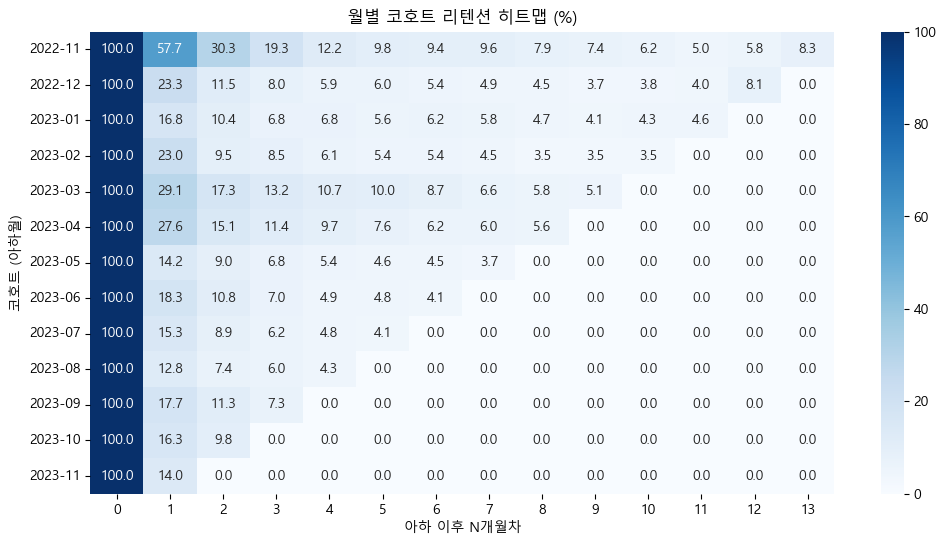

In [62]:
# 히트맵 
plt.figure(figsize=(12, 6))
sns.heatmap(retention_table, annot=True, fmt=".1f", cmap="Blues")
plt.title("월별 코호트 리텐션 히트맵 (%)")
plt.ylabel("코호트 (아하월)")
plt.xlabel("아하 이후 N개월차")
plt.show()

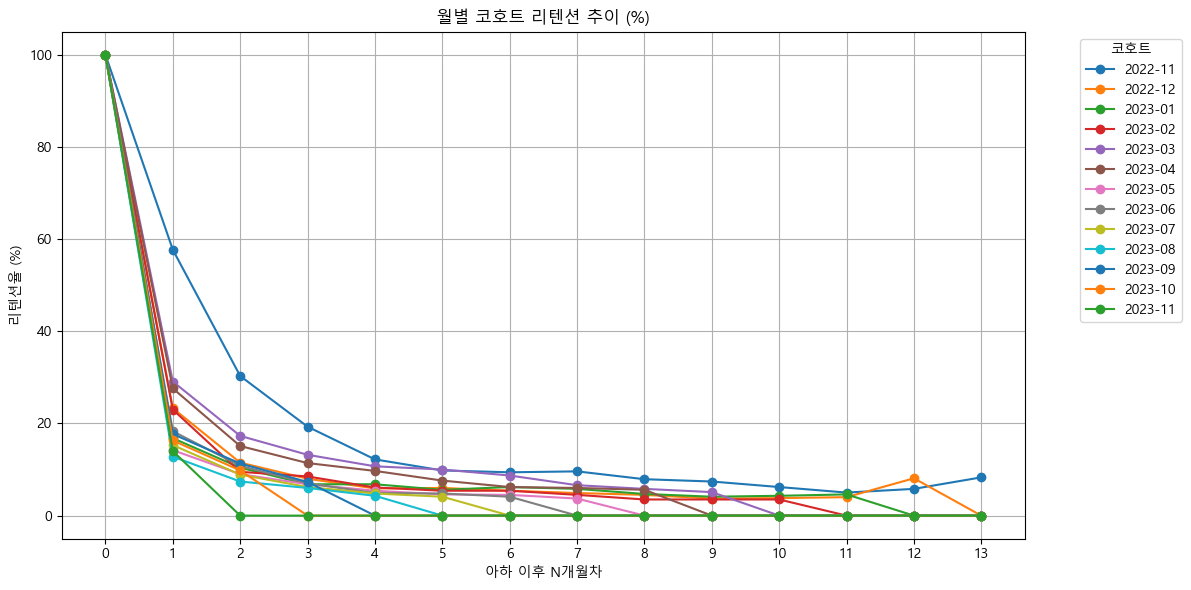

In [63]:
# 라인그래프
plt.figure(figsize=(12, 6))

# retention_table의 index (cohort)마다 하나씩 선 그리기
for cohort in retention_table.index:
    plt.plot(
        retention_table.columns,  # X축: months_since_aha (0, 1, 2, ...)
        retention_table.loc[cohort],  # Y축: 리텐션률
        marker='o',  # 각 점에 동그라미 마커
        label=str(cohort)  # 코호트명을 라벨로
    )

plt.title("월별 코호트 리텐션 추이 (%)")
plt.xlabel("아하 이후 N개월차")
plt.ylabel("리텐션율 (%)")
plt.xticks(retention_table.columns)  # x축 눈금 고정
plt.legend(title="코호트", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


- 주별 코호트 리텐션

In [64]:
# weeks_since_aha
user_act['weeks_since_aha'] = (user_act['days_since_aha'] // 7).astype(int)
cohort_data = (
    user_act
    .drop_duplicates(subset=['user_id', 'weeks_since_aha'])  # 중복 제거
    .groupby(['cohort_months', 'weeks_since_aha'])['user_id']
    .nunique()
    .unstack(fill_value=0)  # 리텐션 테이블 형태로 pivot
)

# 코호트 비율 계산
cohort_size = cohort_data.iloc[:, 0]
retention_table = cohort_data.divide(cohort_size, axis=0).round(3)*100

In [65]:
retention_table

weeks_since_aha,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,60
cohort_months,,,,,,,,,,,,,,,,,,,,,
2022-11,100.0,41.7,34.1,35.3,33.2,19.1,16.1,13.3,17.1,12.8,...,2.1,2.4,1.8,2.8,2.3,2.9,4.4,1.9,0.6,0.1
2022-12,100.0,17.2,14.0,11.7,10.1,8.8,8.1,6.8,6.3,5.5,...,1.7,2.5,4.9,0.8,0.5,0.2,0.1,0.0,0.0,0.0
2023-01,100.0,16.5,12.8,10.1,8.9,7.5,6.3,5.5,5.3,4.9,...,1.0,0.6,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02,100.0,21.2,12.9,9.5,7.6,7.2,5.8,5.5,4.8,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03,100.0,29.0,16.6,14.7,12.7,14.4,9.2,8.3,7.4,9.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-04,100.0,29.3,18.5,15.0,10.4,12.0,7.6,7.5,6.4,8.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05,100.0,10.3,8.2,6.3,6.7,4.7,5.0,4.5,5.3,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06,100.0,13.8,10.7,9.3,9.0,7.3,5.6,5.3,5.0,4.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07,100.0,11.6,9.7,8.0,8.2,6.1,5.1,4.5,4.4,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


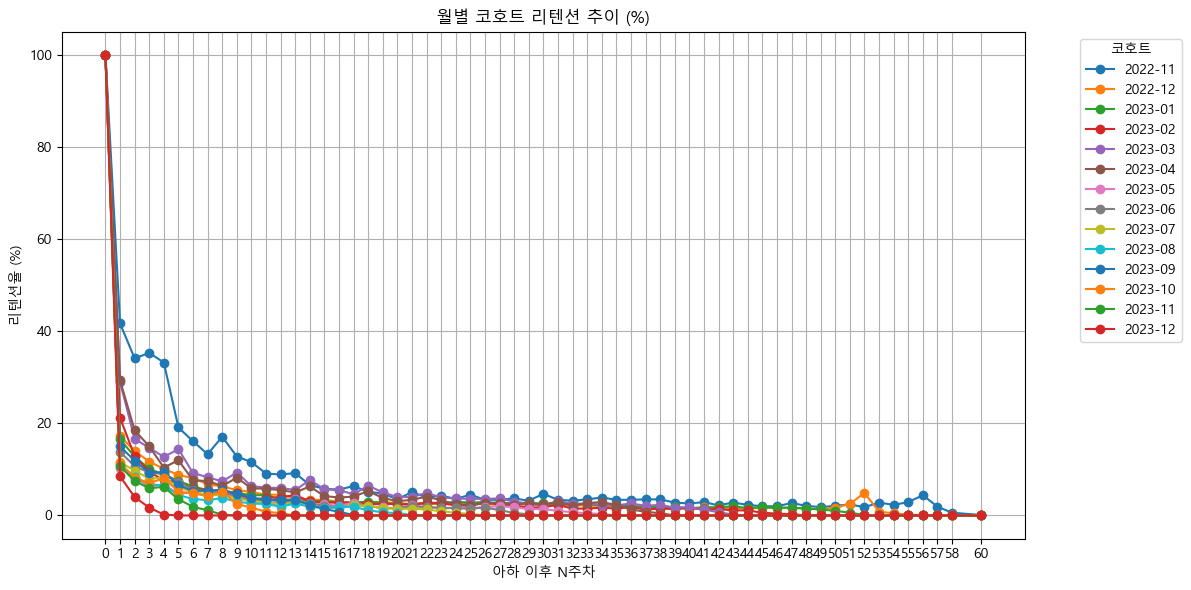

In [66]:
plt.figure(figsize=(12, 6))

# retention_table의 index (cohort)마다 하나씩 선 그리기
for cohort in retention_table.index:
    plt.plot(
        retention_table.columns,  # X축: months_since_aha (0, 1, 2, ...)
        retention_table.loc[cohort],  # Y축: 리텐션률
        marker='o',  # 각 점에 동그라미 마커
        label=str(cohort)  # 코호트명을 라벨로
    )

plt.title("월별 코호트 리텐션 추이 (%)")
plt.xlabel("아하 이후 N주차")
plt.ylabel("리텐션율 (%)")
plt.xticks(retention_table.columns)  # x축 눈금 고정
plt.legend(title="코호트", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


- 첫 달 이내 리텐션 

In [68]:
# 첫 달까지만 데이터 필터터
user_act_first_month = user_act[user_act['weeks_since_aha'] <= 4]

In [71]:
cohort_data = (
    user_act_first_month
    .drop_duplicates(subset=['user_id', 'weeks_since_aha'])  # 중복 제거
    .groupby(['cohort_months', 'weeks_since_aha'])['user_id']
    .nunique()
    .unstack(fill_value=0)  # 리텐션 테이블 형태로 pivot
)
cohort_data

weeks_since_aha,0,1,2,3,4
cohort_months,,,,,
2022-11,1082,451,369,382,359
2022-12,5944,1022,831,695,599
2023-01,7287,1203,935,739,646
2023-02,2200,467,283,210,167
2023-03,1814,526,302,266,231
2023-04,2238,656,415,336,232
2023-05,3568,366,293,225,239
2023-06,5418,746,578,504,490
2023-07,6688,774,648,537,546


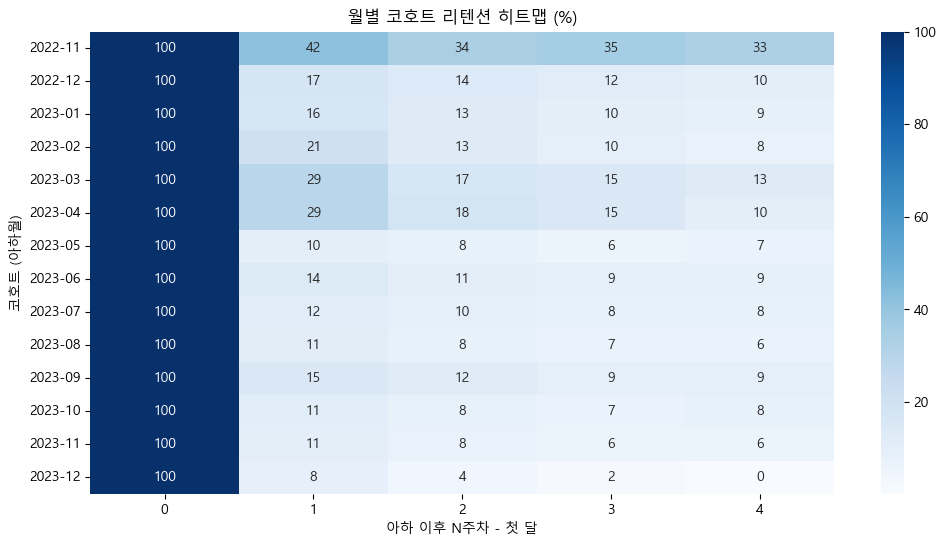

In [72]:
# 코호트 비율 계산
cohort_size = cohort_data.iloc[:, 0]
retention_table = cohort_data.divide(cohort_size, axis=0).round(3)*100

# 히트맵 
plt.figure(figsize=(12, 6))
sns.heatmap(retention_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("월별 코호트 리텐션 히트맵 (%)")
plt.ylabel("코호트 (아하월)")
plt.xlabel("아하 이후 N주차 - 첫 달")
plt.show()

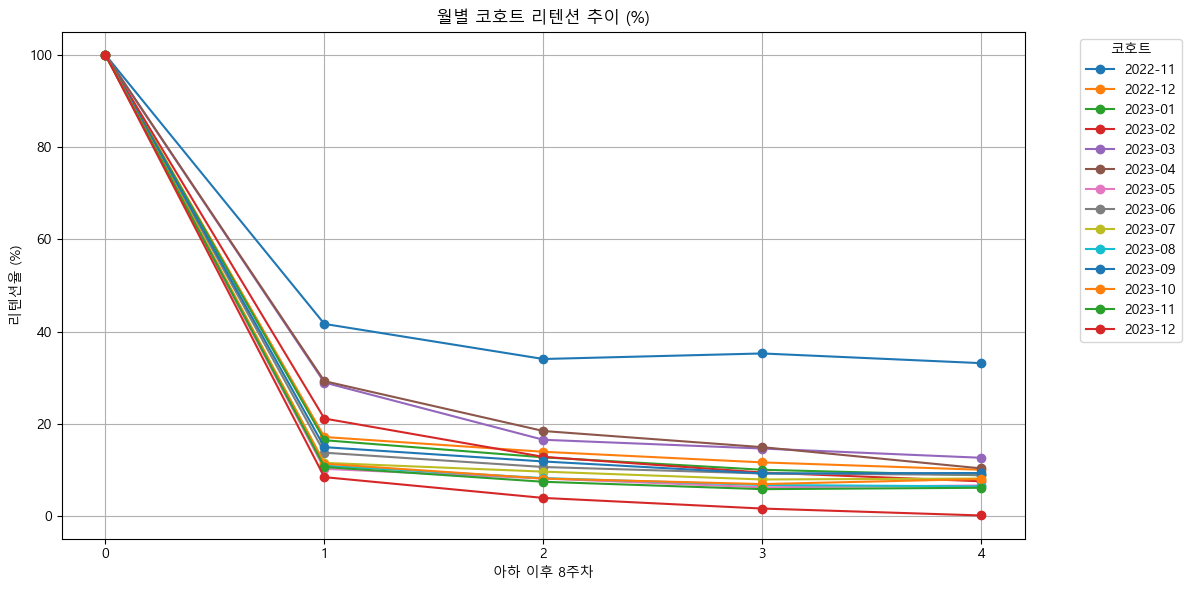

In [73]:
plt.figure(figsize=(12, 6))

# retention_table의 index (cohort)마다 하나씩 선 그리기
for cohort in retention_table.index:
    plt.plot(
        retention_table.columns,  # X축: months_since_aha (0, 1, 2, ...)
        retention_table.loc[cohort],  # Y축: 리텐션률
        marker='o',  # 각 점에 동그라미 마커
        label=str(cohort)  # 코호트명을 라벨로
    )

plt.title("월별 코호트 리텐션 추이 (%)")
plt.xlabel("아하 이후 8주차")
plt.ylabel("리텐션율 (%)")
plt.xticks(retention_table.columns)  # x축 눈금 고정
plt.legend(title="코호트", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
# 최대 일수가 30일이 될 수 없는 코호트 제외 
# 62339 -> 56435 (5904명 제외외)
user_rolling = user_act[user_act['cohort_months'] < '2023-12']

In [80]:
user_act['user_id'].nunique() - user_rolling['user_id'].nunique()

rolling_periods = [1, 7, 15, 30]
records = []

for cohort, group in user_rolling.groupby('cohort_months'):
    size = len(group)
    for N in rolling_periods:
        retained = (group['lasting_days'] >= N).sum()
        rr = retained / size * 100
        records.append((cohort, N, retained, size, round(rr, 1)))

rolling_retention_df = pd.DataFrame(
    records, columns=['cohort', 'N_days', 'retained', 'total', 'retention_rate']
)

pivot_rr = rolling_retention_df.pivot(index='cohort', columns='N_days', values='retention_rate')
pivot_rr

N_days,1,7,15,30
cohort,,,,
2022-11,99.7,99.0,96.4,89.4
2022-12,98.5,97.8,97.0,94.4
2023-01,98.1,96.8,95.4,92.3
2023-02,98.4,94.4,90.1,86.4
2023-03,98.9,94.5,90.2,85.2
2023-04,98.5,94.1,88.2,76.0
2023-05,94.9,90.4,88.4,83.6
2023-06,95.5,91.1,88.6,84.4
2023-07,94.3,91.0,88.0,82.5


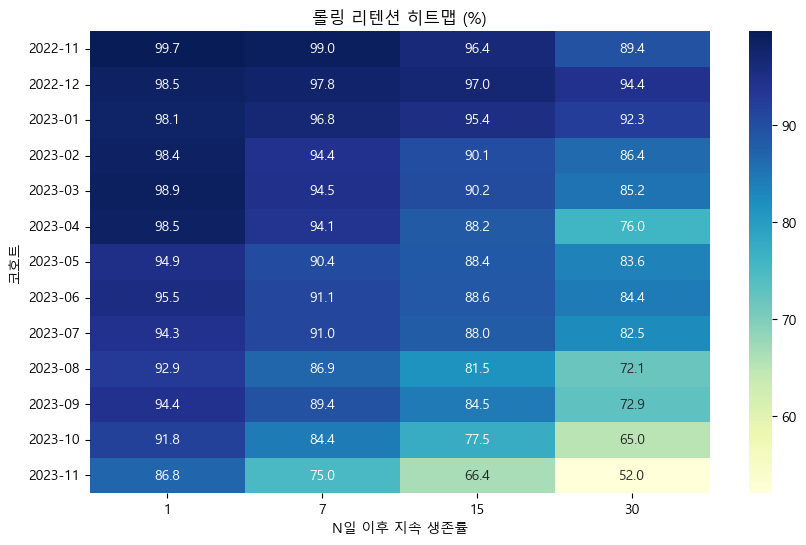

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_rr, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("롤링 리텐션 히트맵 (%)")
plt.xlabel("N일 이후 지속 생존률")
plt.ylabel("코호트")
plt.show()


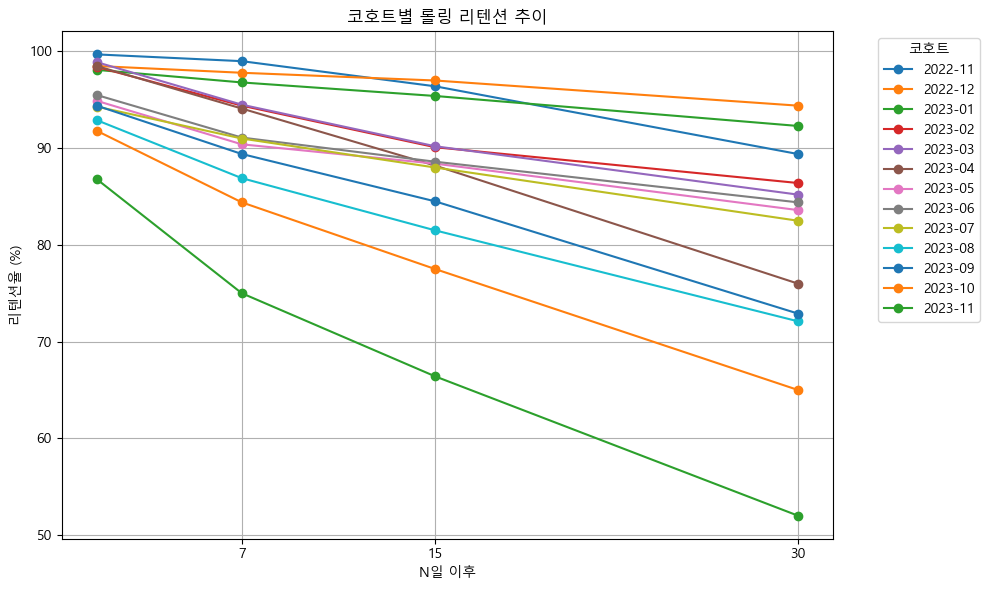

In [82]:
plt.figure(figsize=(10, 6))
for cohort in pivot_rr.index:
    plt.plot(pivot_rr.columns, pivot_rr.loc[cohort], marker='o', label=str(cohort))

plt.title("코호트별 롤링 리텐션 추이")
plt.xlabel("N일 이후")
plt.ylabel("리텐션율 (%)")
plt.xticks([7, 15, 30])  
plt.legend(title="코호트", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



- 세그먼트 간 통계적 검정

In [ ]:
user_act = pd.read_csv(
    'user_act_combined.csv',
    encoding='utf-8-sig',
    parse_dates=['client_event_time', 'aha_date']
)
enter_lesson = pd.read_csv(
    'enter_lesson_after_b(version_1_lesson_1).csv',
    encoding='utf-8-sig'
)
complete_lesson = pd.read_csv(
    'complete.lesson.csv',
    encoding='utf-8-sig'
)

# 2. Aha 기준일 및 이벤트일, days_since_aha 계산
user_act['event_day'] = user_act['client_event_time'].dt.date
user_act['aha_day']   = user_act['aha_date'].dt.date
user_act['days_since_aha'] = (
    pd.to_datetime(user_act['event_day']) -
    pd.to_datetime(user_act['aha_day'])
).dt.days

# 3. 사용자별 서비스 이용 기간(lasting_days) 계산
user_span = (
    user_act
    .groupby('user_id')['event_day']
    .agg(first_event='min', last_event='max')
    .reset_index()
)
user_span['lasting_days'] = (
    pd.to_datetime(user_span['last_event']) -
    pd.to_datetime(user_span['first_event'])
).dt.days

In [ ]:
# 4. 사용자별 "첫 재방문" 일수 계산 (0 = 이탈)
first_return = (
    user_act[user_act['days_since_aha'] > 0]
    .groupby('user_id')['days_since_aha']
    .min()
    .reset_index()
    .rename(columns={'days_since_aha':'first_return_day'})
)

# 5. 메타데이터 통합
df = (
    user_span
    .merge(first_return, on='user_id', how='left')
    .fillna({'first_return_day': 0})
)

# 6. 세그먼트 할당 함수
def assign_segment(row):
    if row['lasting_days'] == 0:
        return 'never_return'
    elif row['first_return_day'] == 1:
        return 'first_day'
    elif 2 <= row['first_return_day'] <= 7:
        return 'second_day'
    elif 8 <= row['first_return_day'] <= 30:
        return 'first_week'
    else:
        return 'second_week'

df['segment'] = df.apply(assign_segment, axis=1)

# 7. 지표 계산
# 7-1. 콘텐츠 수강 시도 수
attempts = (
    enter_lesson
    .groupby('user_id')['lesson.id']
    .count()
    .reset_index(name='attempts')
)
# 7-2. 레슨 완료 수
completions = (
    complete_lesson
    .groupby('user_id')['lesson.id']
    .count()
    .reset_index(name='completions')
)
# 7-3. 추정 LTV (개월 단위 반올림 없이 나눗셈)
monthly_price = 15920
df['months_active']   = df['lasting_days'] // 30
df['estimated_LTV']   = df['months_active'] * monthly_price

# 8. 최종 데이터셋 병합 (ANOVA 입력용)
metrics = (
    df[['user_id', 'segment', 'lasting_days', 'estimated_LTV']]
    .merge(attempts,     on='user_id', how='left')
    .merge(completions,  on='user_id', how='left')
    .fillna(0)
    .reset_index(drop=True)
)


In [ ]:
variables = ['lasting_days', 'attempts', 'completions', 'estimated_LTV']
segments  = metrics['segment'].unique()

for var in variables:
    print(f"\n=== 변수: {var} ===")
    # 1) 각 세그먼트별 정규성 검정
    for seg in segments:
        data = metrics.loc[metrics['segment']==seg, var]
        stat, p = shapiro(data)
        print(f"  {seg:12s} → W={stat:.3f}, p={p:.3f} "
              f"{'정규성 만족' if p>0.05 else '정규성 불만족'}")
    # 2) 전집단 등분산성 검정
    group_data = [metrics.loc[metrics['segment']==seg, var] for seg in segments]
    stat, p = levene(*group_data)
    print(f"  Levene’s test → W={stat:.3f}, p={p:.3f} "
          f"{'등분산성 만족' if p>0.05 else '등분산성 불만족'}")


변수: lasting_days

| 그룹          | W     | p-value | 정규성 판단 |
| ------------- | ----- | ------- | ----------- |
| first_day     | 0.678 | 0.000   | 불만족      |
| second_day    | 0.646 | 0.000   | 불만족      |
| never_return  | 1.000 | 1.000   | 만족        |
| second_week   | 0.904 | 0.000   | 불만족      |
| first_week    | 0.619 | 0.000   | 불만족      |

Levene’s test: W = 4773.086, p = 0.000 → 등분산성 불만족

---

변수: attempts

| 그룹          | W     | p-value | 정규성 판단 |
| ------------- | ----- | ------- | ----------- |
| first_day     | 0.445 | 0.000   | 불만족      |
| second_day    | 0.391 | 0.000   | 불만족      |
| never_return  | 0.506 | 0.000   | 불만족      |
| second_week   | 0.193 | 0.000   | 불만족      |
| first_week    | 0.332 | 0.000   | 불만족      |

Levene’s test: W = 1557.111, p = 0.000 → 등분산성 불만족

---

변수: completions

| 그룹          | W     | p-value | 정규성 판단 |
| ------------- | ----- | ------- | ----------- |
| first_day     | 0.519 | 0.000   | 불만족      |
| second_day    | 0.500 | 0.000   | 불만족      |
| never_return  | 0.314 | 0.000   | 불만족      |
| second_week   | 0.237 | 0.000   | 불만족      |
| first_week    | 0.434 | 0.000   | 불만족      |

Levene’s test: W = 2323.400, p = 0.000 → 등분산성 불만족

---

변수: estimated_LTV

| 그룹          | W     | p-value | 정규성 판단 |
| ------------- | ----- | ------- | ----------- |
| first_day     | 0.634 | 0.000   | 불만족      |
| second_day    | 0.600 | 0.000   | 불만족      |
| never_return  | 1.000 | 1.000   | 만족        |
| second_week   | 0.880 | 0.000   | 불만족      |
| first_week    | 0.586 | 0.000   | 불만족      |

Levene’s test: W = 3897.212, p = 0.000 → 등분산성 불만족


데이터의 정규성, 등분산성 검정 결과, 분포가 정규성, 등분산성을 만족하지 않아 분산분석을 수행할 수 없다고 판단해 Kruskal-Wallis 검정으로 대체.

In [ ]:
from scipy.stats import kruskal

# 검사할 컬럼 리스트
cols = ['lasting_days', 'attempts', 'completions', 'estimated_LTV']
alpha = 0.05

# 세그먼트 라벨
groups = metrics['segment'].unique()

for col in cols:
    # 각 세그먼트별 샘플 추출
    samples = [metrics.loc[metrics.segment == g, col] for g in groups]
    # Kruskal–Wallis 검정
    h, p = kruskal(*samples)
    # 결과 출력
    print(f"=== {col} ===")
    print(f"H = {h:.3f}, p = {p:.3f}")
    if p < alpha:
        print(f"p ≤ {alpha} → H₀ 기각: 적어도 한 세그먼트 간 차이가 있음\n")
    else:
        print(f"p > {alpha} → H₀ 기각 불가: 세그먼트 간 유의미한 차이 없음\n")


lasting_days

- H = 58837.234, p = 0.000  
- p ≤ 0.05 → H₀ 기각: 적어도 한 세그먼트 간 차이가 있음

---

attempts

- H = 6026.249, p = 0.000  
- p ≤ 0.05 → H₀ 기각: 적어도 한 세그먼트 간 차이가 있음

---

completions

- H = 20024.068, p = 0.000  
- p ≤ 0.05 → H₀ 기각: 적어도 한 세그먼트 간 차이가 있음

---

estimated_LTV

- H = 27615.489, p = 0.000  
- p ≤ 0.05 → H₀ 기각: 적어도 한 세그먼트 간 차이가 있음


In [ ]:
import scikit_posthocs as sp

cols = ['lasting_days', 'attempts', 'completions', 'estimated_LTV']
for col in cols:
    print(f"\n=== {col} ===")
    # p‑value Bonferroni 보정
    pmat = sp.posthoc_dunn(
        metrics,
        val_col=col,
        group_col='segment',
        p_adjust='bonferroni'
    )
    print(pmat)

lasting_days

|              | first_day     | first_week   | never_return  | second_day    | second_week   |
|--------------|---------------|--------------|---------------|---------------|---------------|
| **first_day**   | 1.000000e+00  | 1.094039e-14 | 0.000000e+00  | 1.911890e-01  | 3.943613e-96  |
| **first_week**  | 1.094039e-14  | 1.000000e+00 | 0.000000e+00  | 6.189138e-08  | 4.974767e-26  |
| **never_return**| 0.000000e+00  | 0.000000e+00 | 1.000000e+00  | 0.000000e+00  | 0.000000e+00  |
| **second_day**  | 1.911890e-01  | 6.189138e-08 | 0.000000e+00  | 1.000000e+00  | 5.027008e-72  |
| **second_week** | 3.943613e-96  | 4.974767e-26 | 0.000000e+00  | 5.027008e-72  | 1.000000e+00  |

---

attempts

|              | first_day     | first_week   | never_return  | second_day    | second_week   |
|--------------|---------------|--------------|---------------|---------------|---------------|
| **first_day**   | 1.000000e+00  | 1.671535e-36 | 0.000000e+00  | 3.834287e-17  | 1.109645e-72  |
| **first_week**  | 1.671535e-36  | 1.000000e+00 | 6.825666e-170| 3.230537e-07  | 4.619199e-05  |
| **never_return**| 0.000000e+00  | 6.825666e-170| 1.000000e+00  | 0.000000e+00  | 6.824053e-99  |
| **second_day**  | 3.834287e-17  | 3.230537e-07 | 0.000000e+00  | 1.000000e+00  | 9.224450e-26  |
| **second_week** | 1.109645e-72  | 4.619199e-05 | 6.824053e-99  | 9.224450e-26  | 1.000000e+00  |

---

completions

|              | first_day     | first_week   | never_return  | second_day    | second_week    |
|--------------|---------------|--------------|---------------|---------------|----------------|
| **first_day**   | 1.000000e+00  | 5.833899e-146| 0.000000e+00  | 3.680456e-43  | 1.761222e-298  |
| **first_week**  | 5.833899e-146| 1.000000e+00 | 0.000000e+00  | 1.015136e-42  | 1.424686e-20   |
| **never_return**| 0.000000e+00  | 0.000000e+00 | 1.000000e+00  | 0.000000e+00  | 2.076012e-257  |
| **second_day**  | 3.680456e-43  | 1.015136e-42 | 0.000000e+00  | 1.000000e+00  | 6.779744e-133  |
| **second_week** | 1.761222e-298| 1.424686e-20 | 2.076012e-257 | 6.779744e-133| 1.000000e+00   |

---

estimated_LTV

|              | first_day     | first_week   | never_return  | second_day    | second_week   |
|--------------|---------------|--------------|---------------|---------------|---------------|
| **first_day**   | 1.000000e+00  | 5.568347e-07 | 0.000000e+00  | 1.039860e-09  | 0.000000e+00  |
| **first_week**  | 5.568347e-07  | 1.000000e+00 | 0.000000e+00  | 1.000000e+00  | 0.000000e+00  |
| **never_return**| 0.000000e+00  | 0.000000e+00 | 1.000000e+00  | 0.000000e+00  | 0.000000e+00  |
| **second_day**  | 1.039860e-09  | 1.000000e+00 | 0.000000e+00  | 1.000000e+00  | 0.000000e+00  |
| **second_week** | 0.000000e+00  | 0.000000e+00 | 0.000000e+00  | 0.000000e+00  | 1.000000e+00  |


6.1.2 코호트 별 세그먼트 생존분석

In [6]:
import pandas as pd
user_act_filtered = pd.read_csv('output/진짜최종전처리.csv', encoding='utf-8-sig')
user_act_filtered.sort_values(['user_id', 'client_event_time'])

,user_id,client_event_time,source,aha_day_norm,event_day_norm,days_since_aha,lasting_days,aha_month,event_month
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:34:28.892,lesson_start,2023-03-18,2023-03-18,0.0,68.0,2023-03,2023-03
161,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:37:05.778,lesson_start,2023-03-18,2023-03-18,0.0,68.0,2023-03,2023-03
162,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:42:48.654,lesson_start,2023-03-18,2023-03-18,0.0,68.0,2023-03,2023-03
163,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:46:07.383,lesson_start,2023-03-18,2023-03-18,0.0,68.0,2023-03,2023-03
164,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:51:40.154,lesson_start,2023-03-18,2023-03-18,0.0,68.0,2023-03,2023-03
...,...,...,...,...,...,...,...,...,...
8771514,ffffd8d78865a66cb3706977f29d1dec,2023-11-30 03:33:26.809,content_page,2023-09-11,2023-11-30,80.0,80.0,2023-09,2023-11
8771513,ffffd8d78865a66cb3706977f29d1dec,2023-11-30 03:37:04.847,content_page,2023-09-11,2023-11-30,80.0,80.0,2023-09,2023-11
8771512,ffffd8d78865a66cb3706977f29d1dec,2023-11-30 03:37:20.113,content_page,2023-09-11,2023-11-30,80.0,80.0,2023-09,2023-11
8771511,ffffd8d78865a66cb3706977f29d1dec,2023-11-30 03:37:51.652,content_page,2023-09-11,2023-11-30,80.0,80.0,2023-09,2023-11


In [7]:
#1) — 날짜 타입 변환 & 코호트 컬럼 생성
user_act_filtered['client_event_time'] = pd.to_datetime(user_act_filtered['client_event_time'])
user_act_filtered['event_day_norm']   = pd.to_datetime(user_act_filtered['event_day_norm'])
user_act_filtered['aha_day_norm']     = pd.to_datetime(user_act_filtered['aha_day_norm'])

#월 단위 코호트용 별도 컬럼 (Period[M])
user_act_filtered['aha_month']   = user_act_filtered['aha_day_norm'].dt.to_period('M')
user_act_filtered['event_month'] = user_act_filtered['event_day_norm'].dt.to_period('M')


#2) — 전체 코호트 크기 계산
cohort_size = (
    user_act_filtered
    .drop_duplicates(['user_id','aha_month'])
    .groupby('aha_month')['user_id']
    .size()
)

cohort_size

aha_month
2022-11    1082
2022-12    5944
2023-01    7287
2023-02    2200
2023-03    1814
2023-04    2238
2023-05    3568
2023-06    5418
2023-07    6688
2023-08    5705
2023-09    4127
2023-10    3982
2023-11    6382
2023-12    5904
Freq: M, Name: user_id, dtype: int64

In [8]:
# 1) days_since_aha > 0인 로우에서 user_id×aha_month별 최소 재방문 일수 계산
first_return = (
    user_act_filtered[user_act_filtered['days_since_aha'] > 0]
    .groupby(['user_id', 'aha_month'])['days_since_aha']
    .min()
    .reset_index(name='first_return_day')
)

# 2) 라벨링 함수 정의
def label_segment(days):
    if days == 1:
        return 'Day 1 Return'
    elif 2 <= days <= 7:
        return 'Day 2–7 Return'
    elif 8 <= days <= 30:
        return 'Week 2–4 Return'
    else:
        return None

# 3) 세그먼트 컬럼 추가
first_return['segment'] = first_return['first_return_day'].apply(label_segment)

# 4) 세그먼트별 유저 목록 (DataFrame) 생성
segments = {
    seg: df[['user_id', 'aha_month', 'first_return_day']]
    for seg, df in first_return[first_return['segment'].notna()]
                   .groupby('segment')
}

# (필요 시) 각 세그먼트별 간단히 유저 수 출력
for seg, df in segments.items():
    print(f"{seg}: {df['user_id'].nunique()} users")

# 5) 피벗 테이블로 코호트×세그먼트별 유저 수 요약
cohort_segment_counts = (
    first_return.dropna(subset=['segment'])
    .pivot_table(
        index='aha_month',
        columns='segment',
        values='user_id',
        aggfunc='nunique',
        fill_value=0
    )
    .reset_index()
)
print(cohort_segment_counts)

Day 1 Return: 9925 users
Day 2–7 Return: 6727 users
Week 2–4 Return: 3304 users
segment aha_month  Day 1 Return  Day 2–7 Return  Week 2–4 Return
0         2022-11           407             198              121
1         2022-12          1007             729              483
2         2023-01          1246             810              378
3         2023-02           435             346              123
4         2023-03           494             332               69
5         2023-04           569             413              126
6         2023-05           514             353              167
7         2023-06           838             598              303
8         2023-07           855             617              356
9         2023-08           784             516              280
10        2023-09           630             462              227
11        2023-10           531             356              210
12        2023-11           870             529              299
13        

In [9]:
# 1) 전체 코호트 유저(user_id × aha_month) 추출
cohort_users = (
    user_act_filtered
    .drop_duplicates(['user_id','aha_month'])
    [['user_id','aha_month']]
)

# 2) A‑ha 이후 첫 재방문 일수 계산
first_return = (
    user_act_filtered[user_act_filtered['days_since_aha'] > 0]
    .groupby(['user_id', 'aha_month'])['days_since_aha']
    .min()
    .reset_index(name='first_return_day')
)

# 3) 병합 (재방문 없으면 NaN)
cohort_users = cohort_users.merge(
    first_return,
    on=['user_id','aha_month'],
    how='left'
)

# 4) 라벨링 함수: NaN은 Churned
def label_with_churn(x):
    if pd.isna(x):
        return 'Churned'
    elif x == 1:
        return 'Day 1 Return'
    elif 2 <= x <= 7:
        return 'Day 2–7 Return'
    elif 8 <= x <= 30:
        return 'Week 2–4 Return'
    else:
        return None  # 30일 이상 뒤에 돌아온 케이스는 필요에 따라 추가 분류

cohort_users['segment'] = cohort_users['first_return_day'].apply(label_with_churn)

# 5) 피벗 테이블로 재구성
cohort_segment_counts = (
    cohort_users
    .dropna(subset=['segment'])               # 라벨이 None인 경우 제외
    .pivot_table(
        index='aha_month',
        columns='segment',
        values='user_id',
        aggfunc='nunique',
        fill_value=0
    )
    .reset_index()
)

cohort_segment_counts

segment,aha_month,Churned,Day 1 Return,Day 2–7 Return,Week 2–4 Return
0,2022-11,289,407,198,121
1,2022-12,3325,1007,729,483
2,2023-01,4420,1246,810,378
3,2023-02,1157,435,346,123
4,2023-03,815,494,332,69
5,2023-04,984,569,413,126
6,2023-05,2255,514,353,167
7,2023-06,3366,838,598,303
8,2023-07,4533,855,617,356
9,2023-08,3891,784,516,280


In [10]:
df = user_act_filtered

# 1) 데이터 로드 및 전처리
df['aha_month'] = df['aha_day_norm'].dt.to_period('M')

# 2) 사용자 단위로 first_return_day 및 lasting_days 추출
user_summary = df.drop_duplicates(['user_id','aha_month']).copy()
# first_return_day 계산
first_return = (
    df[df['days_since_aha'] > 0]
    .groupby(['user_id','aha_month'])['days_since_aha']
    .min()
    .reset_index(name='first_return_day')
)
user_summary = user_summary.merge(first_return, on=['user_id','aha_month'], how='left')

# 3) 세그먼트 분류
def classify_segment(x):
    if pd.isna(x):
        return 'Churned'
    elif x == 1:
        return 'Day 1 Return'
    elif 2 <= x <= 7:
        return 'Day 2–7 Return'
    elif 8 <= x <= 30:
        return 'Week 2–4 Return'
    else:
        return 'Other'
user_summary['segment'] = user_summary['first_return_day'].apply(classify_segment)

# 4) duration (최대 90일) 및 event_observed 설정
user_summary['duration'] = user_summary['lasting_days'].clip(upper=90)
user_summary['event_observed'] = user_summary['segment'] == 'Churned'

In [11]:
# user_summary 컬럼 순서 예시
user_summary = user_summary[[
    'user_id',          # 사용자 ID
    'aha_month',        # A-ha 발생 월(코호트)
    'first_return_day', # A-ha 후 첫 복귀까지 걸린 일수(NA면 이탈)
    'lasting_days',     # A-ha 발생부터 마지막 이벤트까지 걸린 총 일수
    'segment',          # first_return_day 에 따라 분류한 리턴 세그먼트
    'duration',         # 생존시간(최대 90일로 클리핑)
    'event_observed'    # 이탈 여부 (True = 이탈, False = 관찰중 유지)
]]

,user_id,aha_month,first_return_day,lasting_days,segment,duration,event_observed
0,0000572f2ba8079bcefd2760b632e820,2023-03,1.0,68.0,Day 1 Return,68.0,False
1,000087537cbfd934375364218ff10f91,2023-03,5.0,35.0,Day 2–7 Return,35.0,False
2,000117267e1dd62481ef3ae7fb420107,2022-12,NaN,0.0,Churned,0.0,True
3,0001f15911b404f3bf5b8571afafa4e4,2023-11,3.0,31.0,Day 2–7 Return,31.0,False
4,0001f28a707789a7d78dc28fd2e84dce,2023-10,NaN,0.0,Churned,0.0,True
...,...,...,...,...,...,...,...
62334,fffcf1b556d8cdc176d09e54cc9a73df,2023-05,NaN,0.0,Churned,0.0,True
62335,fffd757f689e039a1d4db0adc1b80b61,2023-01,NaN,0.0,Churned,0.0,True
62336,fffe529de03d6187ef7ed765650c8d2b,2023-03,1.0,304.0,Day 1 Return,90.0,False
62337,ffffd8d78865a66cb3706977f29d1dec,2023-09,33.0,80.0,Other,80.0,False


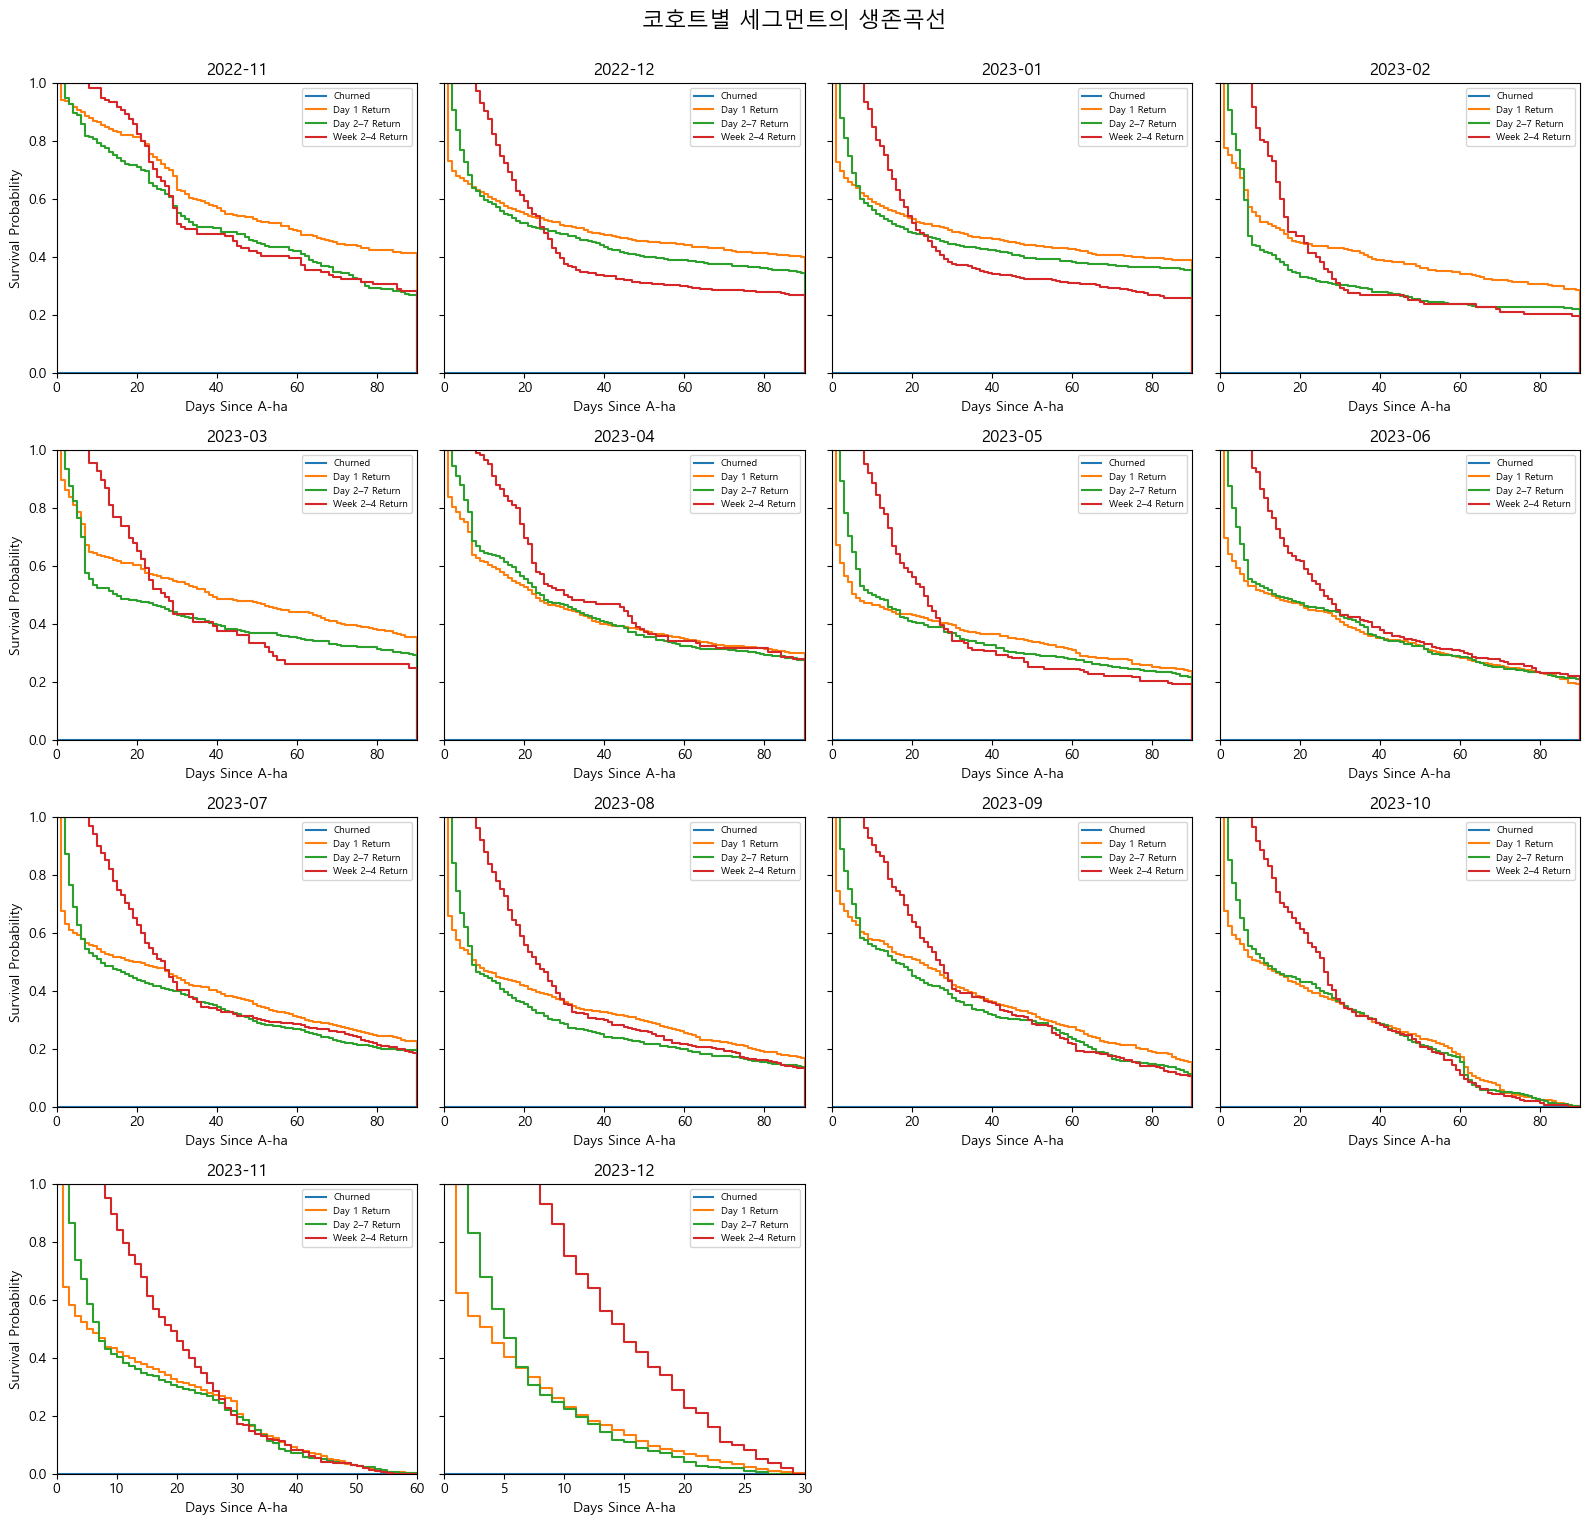

In [18]:
months = sorted(user_summary['aha_month'].astype(str).unique())
n = len(months)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows), sharey=True)
axes = axes.flatten()

for idx, month in enumerate(months):
    ax = axes[idx]

    # 월별 x축 최대값 설정
    if month == '2023-11':
        max_day = 60
    elif month == '2023-12':
        max_day = 30
    else:
        max_day = 90

    time_grid = range(0, max_day + 1)
    monthly = user_summary[user_summary['aha_month'].astype(str) == month]
    monthly = monthly[monthly['segment'] != 'Other']

    for seg, group in monthly.groupby('segment'):
        durations = group['duration'].values
        n_grp = len(durations)
        surv = [(durations > t).sum() / n_grp for t in time_grid]
        ax.step(time_grid, surv, where='post', label=seg)

    ax.set_title(month)
    ax.set_xlim(0, max_day)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Days Since A-ha')
    # 첫 번째 열이면 y 라벨 표시
    if idx % cols == 0:
        ax.set_ylabel('Survival Probability')
    ax.legend(fontsize='x-small')

# 남는 서브플롯 숨기기
for ax in axes[n:]:
    ax.axis('off')

fig.suptitle(
    '코호트별 세그먼트의 생존곡선',
    y=0.95, fontsize=16
)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

In [ ]:
from lifelines import KaplanMeierFitter

df['aha_month'] = df['aha_day_norm'].dt.to_period('M')
first_return = (
    df[df['days_since_aha'] > 0]
    .groupby(['user_id','aha_month'])['days_since_aha']
    .min()
    .reset_index(name='first_return_day')
)

lasting = (
    df.groupby(['user_id','aha_month'])['days_since_aha']
      .max()
      .reset_index(name='lasting_days')
)

user_summary = first_return.merge(lasting, on=['user_id','aha_month'], how='outer')

# churned(리턴 없는) 유저의 first_return_day는 NaN, lasting_days는 max 관측치
# 결측 보완 후 세그먼트 분류
def classify_segment(x):
    if pd.isna(x):
        return 'Churned'
    elif x == 1:
        return 'Day 1 Return'
    elif 2 <= x <= 7:
        return 'Day 2–7 Return'
    elif 8 <= x <= 30:
        return 'Week 2–4 Return'
    else:
        return 'Other'
user_summary['segment'] = user_summary['first_return_day'].apply(classify_segment)

# duration & event_observed 재설정
user_summary['duration'] = user_summary['lasting_days'].clip(upper=90)
# lasting_days < 90 인 경우 churn 이벤트(True), 그렇지 않으면 검열(False)
user_summary['event_observed'] = user_summary['lasting_days'] < 90

# Kaplan‑Meier 생존율 계산
kmf = KaplanMeierFitter()
surv = []
for seg, grp in user_summary.groupby('segment'):
    kmf.fit(grp['duration'], grp['event_observed'], label=seg)
    surv.append({
        'segment': seg,
        'Day 1 Survival':  kmf.predict(1),
        'Day 90 Survival': kmf.predict(90)
    })

result = pd.DataFrame(surv).set_index('segment')
print(result)


                 Day 1 Survival  Day 90 Survival
segment                                         
Churned                0.000000         0.000000
Day 1 Return           0.721511         0.224887
Day 2–7 Return         1.000000         0.197265
Other                  1.000000         0.560993
Week 2–4 Return        1.000000         0.170097


In [17]:
days = [30, 60, 90]
kmf = KaplanMeierFitter()
survival_all = []

for seg, grp in user_summary.groupby('segment'):
    kmf.fit(grp['duration'], grp['event_observed'], label=seg)
    rates = {f"Day {d}": kmf.predict(d) for d in days}
    rates['segment'] = seg
    survival_all.append(rates)

df_all = pd.DataFrame(survival_all).set_index('segment').rename_axis(None)

# 2) Exclude 'Other' segment
filtered = user_summary[user_summary['segment'] != 'Other']
survival_exclude = []

for seg, grp in filtered.groupby('segment'):
    kmf.fit(grp['duration'], grp['event_observed'], label=seg)
    rates = {f"Day {d}": kmf.predict(d) for d in days}
    rates['segment'] = seg
    survival_exclude.append(rates)

df_exclude = pd.DataFrame(survival_exclude).set_index('segment').rename_axis(None)

# 3) Merge 'Other' with 'Churned'
merged = user_summary.copy()
merged['segment'] = merged['segment'].replace('Other', 'Churned/Other')
survival_merged = []

for seg, grp in merged.groupby('segment'):
    kmf.fit(grp['duration'], grp['event_observed'], label=seg)
    rates = {f"Day {d}": kmf.predict(d) for d in days}
    rates['segment'] = seg
    survival_merged.append(rates)

df_merged = pd.DataFrame(survival_merged).set_index('segment').rename_axis(None)
df_merged[2:5]

,Day 30,Day 60,Day 90
Day 1 Return,0.395970,0.289270,0.224887
Day 2–7 Return,0.362866,0.253902,0.197265
Week 2–4 Return,0.351998,0.232748,0.170097


### 6.2 유저 행동 패턴에 따른 재방문율 분석

In [26]:
# 데이터 로드
df = pd.read_csv('output/진짜최종전처리.csv')

In [27]:
# aha_month를 datetime으로 변환 후 코호트 필터링 (2022‑11월 이후 가입 유저)
cohort = df[df['aha_month'] >= '2022-11-01']

# days_since_aha를 정수형으로 변환
cohort['days_since_aha'] = pd.to_numeric(cohort['days_since_aha'], errors='coerce').fillna(-1).astype(int)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_73244\2635195617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['days_since_aha'] = pd.to_numeric(cohort['days_since_aha'], errors='coerce').fillna(-1).astype(int)


In [28]:
# Day 0 / Day 1 분리
day0_all = cohort[cohort['days_since_aha'] == 0]
day1    = cohort[cohort['days_since_aha'] == 1]

# Day 0 중 'complete_lesson' 발생 유저만 가져오기
day0_completed = day0_all[day0_all['source'] == 'complete_lesson']

In [30]:
# 세그먼트 플래그 생성 (후기(content_review), 질문(lesson_question))
actions = (
    day0_completed
    .groupby('user_id')
    .apply(lambda x: pd.Series({
        'saw_review': int((day0_all.loc[(day0_all['user_id']==x.name), 'source'] == 'content_review').any()),
        'saw_qna':    int((day0_all.loc[(day0_all['user_id']==x.name), 'source'] == 'lesson_question').any())
    }))
    .reset_index()
)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_73244\136638610.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [31]:
# Day+1 리텐션 플래그
retention = (
    day1
    .groupby('user_id')
    .size()
    .gt(0)
    .astype(int)
    .rename('retained')
    .reset_index()
)

In [32]:
# 세그먼트 + 리텐션 결합
summary = actions.merge(retention, on='user_id', how='left').fillna({'retained':0})
summary['retained'] = summary['retained'].astype(int)
summary['users'] = 1

In [33]:
# 그룹별 집계 및 리텐션 계산
agg = (
    summary
    .groupby(['saw_review','saw_qna'])
    .agg(users=('users','sum'), retained=('retained','sum'))
    .reset_index()
)
agg['d1_retention_rate'] = (agg['retained'] / agg['users'] * 100).round(2)

In [34]:
def label_segment(row):
    if row.saw_review and row.saw_qna:
        return 'Both'
    elif row.saw_review:
        return 'Review Only'
    elif row.saw_qna:
        return 'Question Only'
    else:
        return 'Baseline'

In [35]:
agg['segment'] = agg.apply(label_segment, axis=1)
agg = agg[['segment','users','retained','d1_retention_rate']].sort_values('segment')

agg

,segment,users,retained,d1_retention_rate
0,Baseline,11640,2813,24.17
3,Both,54,29,53.70
1,Question Only,5890,2472,41.97
2,Review Only,31,12,38.71


In [36]:
from scipy.stats import chi2_contingency

# 나온 결과대로 새로 데이터 만들어서 카이제곱 검정 수행
data = {
    'segment': ['Baseline', 'Question Only', 'Review Only', 'Both'],
    'users': [11640, 5890, 31, 54],
    'retained': [2813, 2472, 12, 29]
}
chi_df = pd.DataFrame(data)

# Baseline과 각 세그먼트 비교
baseline = chi_df[chi_df['segment'] == 'Baseline'].iloc[0]
results = []
for _, row in chi_df[chi_df['segment'] != 'Baseline'].iterrows():
    table = np.array([
        [row['retained'], row['users'] - row['retained']],
        [baseline['retained'], baseline['users'] - baseline['retained']]
    ])
    chi2, p, _, _ = chi2_contingency(table)
    results.append({
        'segment': row['segment'],
        'chi2_stat': round(chi2, 3),
        'p_value': round(p, 5)
    })

df_results = pd.DataFrame(results)
df_final = chi_df.merge(df_results, on='segment', how='left')
df_final['d1_retention_rate'] = (df_final['retained'] / df_final['users'] * 100).round(2)


In [37]:
df_final

,segment,users,retained,chi2_stat,p_value,d1_retention_rate
0,Baseline,11640,2813,NaN,NaN,24.17
1,Question Only,5890,2472,587.757,0.00000,41.97
2,Review Only,31,12,2.816,0.09335,38.71
3,Both,54,29,23.910,0.00000,53.70


주요 인사이트: 질문을 한 유저는 질문을 하지 않은 유저보다 약 2배 더 높은 리텐션을 보였다.

### 6.3 레슨 체류 시간에 따른 재방문율 분석

In [28]:
# 1) 데이터 로드 및 날짜 변환
user_act_path = "output/진짜최종전처리.csv"
df_user_act = pd.read_csv(user_act_path, encoding='utf-8-sig')

# 날짜 타입 변환
for col in ['client_event_time', 'event_day_norm', 'aha_day_norm']:
    df_user_act[col] = pd.to_datetime(df_user_act[col])

# 월 단위 코호트용 컬럼 추가
df_user_act['aha_month']   = df_user_act['aha_day_norm'].dt.to_period('M')
df_user_act['event_month'] = df_user_act['event_day_norm'].dt.to_period('M')

# 2) Day0 + Day1 유저 필터링
df_cohort = df_user_act[
    (df_user_act['lasting_days'] == 0) |
    (df_user_act['days_since_aha'].isin([0, 1]))
]

# Day0 유저 (lasting_days == 0)
df_day0 = (
    df_cohort[df_cohort['lasting_days'] == 0]
    [['user_id', 'aha_day_norm']]
    .drop_duplicates()
    .assign(is_day1=0)
)

# Day1 유저 (lasting_days > 0 & days_since_aha > 0)
df_day1 = (
    df_cohort[
        (df_cohort['lasting_days'] > 0) &
        (df_cohort['days_since_aha'] == 1)
    ]
    [['user_id', 'aha_day_norm']]
    .drop_duplicates()
    .assign(is_day1=1)
)

# Day0/Day1 플래그 결합
df_users_flag = pd.concat([df_day0, df_day1], ignore_index=True)

print("Day0 유저 수:", df_day0['user_id'].nunique())
print("Day1 유저 수:", df_day1['user_id'].nunique())


Day0 유저 수: 39522
Day1 유저 수: 9925


In [29]:
# 3) 레슨 관련 테이블 로드 및 필터링
base_ids = df_user_act['user_id'].unique()

# 레슨 시작
lesson_start_path = "enter.lesson_page.csv"
df_lesson_start = pd.read_csv(lesson_start_path, encoding='utf-8')
df_lesson_start = df_lesson_start[df_lesson_start['user_id'].isin(base_ids)]

# 레슨 완료
complete_lesson_path = "complete.lesson.csv"
df_complete_lesson = pd.read_csv(complete_lesson_path, encoding='utf-8')
df_complete_lesson = df_complete_lesson[df_complete_lesson['user_id'].isin(base_ids)]

# 레슨 질문 클릭
lesson_question_path = "click.lesson_page_related_question_box.csv"
df_lesson_question = pd.read_csv(lesson_question_path, encoding='utf-8')
df_lesson_question = df_lesson_question[df_lesson_question['user_id'].isin(base_ids)]

# 4) Day0 / Day1 별 레슨 이벤트 분리
cols_base = ['user_id', 'event_type', 'client_event_time', 'content.id', 'lesson.id']
cols_q    = cols_base + ['question.id']

C:\Users\Yoo\AppData\Local\Temp\ipykernel_90228\3802128994.py:6: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lesson_start = pd.read_csv(lesson_start_path, encoding='utf-8')


In [30]:
# Day0 레슨 이벤트
df_day0_lesson_start   = df_lesson_start[df_lesson_start['user_id'].isin(df_day0['user_id'])]
df_day0_complete       = df_complete_lesson[df_complete_lesson['user_id'].isin(df_day0['user_id'])]
df_day0_question_click = df_lesson_question[df_lesson_question['user_id'].isin(df_day0['user_id'])]

df_day0_start_sel = df_day0_lesson_start[cols_base].copy()
df_day0_comp_sel  = df_day0_complete[cols_base].copy()
df_day0_q_sel     = df_day0_question_click[cols_q].copy()

# Day1 레슨 이벤트
df_day1_lesson_start   = df_lesson_start[df_lesson_start['user_id'].isin(df_day1['user_id'])]
df_day1_complete       = df_complete_lesson[df_complete_lesson['user_id'].isin(df_day1['user_id'])]
df_day1_question_click = df_lesson_question[df_lesson_question['user_id'].isin(df_day1['user_id'])]

df_day1_start_sel = df_day1_lesson_start[cols_base].copy()
df_day1_comp_sel  = df_day1_complete[cols_base].copy()
df_day1_q_sel     = df_day1_question_click[cols_q].copy()

In [31]:
# 5) 최종 병합 & 정렬
df_merged_day0 = pd.concat([df_day0_start_sel, df_day0_comp_sel], ignore_index=True)
df_merged_day0 = df_merged_day0.sort_values(['user_id', 'client_event_time', 'lesson.id']).reset_index(drop=True)

df_merged_day1 = pd.concat([df_day1_start_sel, df_day1_comp_sel], ignore_index=True)
df_merged_day1 = df_merged_day1.sort_values(['user_id', 'client_event_time', 'lesson.id']).reset_index(drop=True)

In [32]:
# 1) Day0/Day1 레슨 이벤트 합치기
merged_events_df = pd.concat(
    [df_merged_day0, df_merged_day1],
    axis=0,
    ignore_index=True
)

# 2) 시간 타입 변환 및 정렬
merged_events_df['client_event_time'] = pd.to_datetime(merged_events_df['client_event_time'])
merged_events_df = merged_events_df.sort_values(
    ['user_id', 'lesson.id', 'client_event_time']
).reset_index(drop=True)

# 3) 이전 이벤트, 이전 시간 컬럼 추가
merged_events_df['prev_event'] = (
    merged_events_df
    .groupby(['user_id', 'lesson.id'])['event_type']
    .shift(1)
)
merged_events_df['prev_time'] = (
    merged_events_df
    .groupby(['user_id', 'lesson.id'])['client_event_time']
    .shift(1)
)

In [33]:
# 4) 레슨 완료 직전 enter 이벤트만 추출
completed_lesson_events_df = merged_events_df[
    (merged_events_df['event_type'] == 'complete.lesson') &
    (merged_events_df['prev_event'] == 'enter.lesson_page')
].copy()

# 5) 지속 시간 계산 (초/분 모두)
diff = completed_lesson_events_df['client_event_time'] - completed_lesson_events_df['prev_time']
completed_lesson_events_df['lesson_duration_sec'] = diff.dt.total_seconds()
completed_lesson_events_df['lesson_duration_min'] = completed_lesson_events_df['lesson_duration_sec'] / 60

# 6) 필터 적용 (1분 초과, 180분 이하)
valid_lesson_events_df = completed_lesson_events_df[
    (completed_lesson_events_df['lesson_duration_sec'] > 60) &
    (completed_lesson_events_df['lesson_duration_min'] <= 180)
].copy()

# 7) “온전한 레슨 이벤트” 개수 확인
total_events = len(valid_lesson_events_df)                   # 총 이벤트 건수
unique_users = valid_lesson_events_df['user_id'].nunique()   # 고유 사용자 수
unique_lessons = valid_lesson_events_df['lesson.id'].nunique()  # 고유 레슨 ID 수

print(
    f"총 온전한 레슨 이벤트: {total_events}\n"
    f"  - 고유 사용자: {unique_users}\n"
    f"  - 고유 레슨 ID: {unique_lessons}"
)

총 온전한 레슨 이벤트: 315160
  - 고유 사용자: 10823
  - 고유 레슨 ID: 4124


In [34]:
# 7) 결과 정렬 및 통계 확인
valid_lesson_events_df = valid_lesson_events_df.sort_values('lesson_duration_sec')

print(valid_lesson_events_df['lesson_duration_min'].describe())

count    315160.000000
mean          9.270704
std          18.154444
min           1.000017
25%           2.393283
50%           4.068942
75%           7.571092
max         179.992017
Name: lesson_duration_min, dtype: float64


1. 초 단위 탐색 패턴
유저들이 매우 짧은 시간(몇 초) 간격으로 레슨간 이동을 반복하며 콘텐츠를 탐색하는 경향이 관찰됨.

2. 완료→시작 로그 중복
일부 유저는 레슨 완료(complete.lesson) 로그 직후 동일한 레슨에 대한 시작(enter.lesson_page) 로그가 한 번 더 기록되는 사례가 확인됨.

3. 시작 없이 완료만 존재
레슨 수강 시작 이력(enter.lesson_page)은 없지만, 완료 이력(complete.lesson)만 남아 있는 유저가 존재함.

In [35]:
lesson_starts_df = df_lesson_start.sort_values(['user_id', 'lesson.id', 'client_event_time'])

# 필요한 컬럼만 선택 및 타입 변환
lesson_starts_sorted_df = (
    lesson_starts_df[['user_id', 'event_type', 'client_event_time', 'content.id', 'lesson.id']]
    .copy()
)
lesson_starts_sorted_df['client_event_time'] = pd.to_datetime(lesson_starts_sorted_df['client_event_time'])
lesson_starts_sorted_df = lesson_starts_sorted_df.sort_values(
    ['user_id', 'lesson.id', 'client_event_time']
).reset_index(drop=True)


In [36]:
# 2) 첫 레슨 시작 정보만 남기기
#   (전체 6,554,780행 → 1,434,570행)
first_lesson_starts_df = lesson_starts_sorted_df.drop_duplicates(
    subset=['user_id', 'lesson.id'],
    keep='first'
)

print(
    "첫 레슨 시작 이벤트 – 행 수:", len(first_lesson_starts_df),
    "/ 유저 수:", first_lesson_starts_df['user_id'].nunique(),
    "/ 레슨 수:", first_lesson_starts_df['lesson.id'].nunique()
)

첫 레슨 시작 이벤트 – 행 수: 1434570 / 유저 수: 62339 / 레슨 수: 4584


In [37]:
# 3) 레슨 완료 로그 중복 제거
unique_complete_lesson_df = (
    df_complete_lesson[['user_id', 'event_type', 'client_event_time', 'content.id', 'lesson.id']]
    .drop_duplicates()
    .copy()
)

# 4) Aha 코호트 기반 사용자 분리
day0_users_df = df_user_act[df_user_act['lasting_days'] == 0].drop_duplicates('user_id')
day1_users_df = (
    df_user_act[~df_user_act['user_id'].isin(day0_users_df['user_id'])]
    .query('days_since_aha > 0')
    .drop_duplicates('user_id')
)

print(
    "Day0 유저 수:", day0_users_df['user_id'].nunique(),
    "/ Day1 유저 수:", day1_users_df['user_id'].nunique()
)

Day0 유저 수: 39522 / Day1 유저 수: 22817


In [38]:
# 5) Day0/Day1 별 시작·완료 이벤트 분리
day0_start_df    = first_lesson_starts_df[first_lesson_starts_df['user_id'].isin(day0_users_df['user_id'])]
day1_start_df    = first_lesson_starts_df[first_lesson_starts_df['user_id'].isin(day1_users_df['user_id'])]
day0_complete_df = unique_complete_lesson_df[unique_complete_lesson_df['user_id'].isin(day0_users_df['user_id'])]
day1_complete_df = unique_complete_lesson_df[unique_complete_lesson_df['user_id'].isin(day1_users_df['user_id'])]

print(
    "Day0 시작 이벤트 유저 수:", day0_start_df['user_id'].nunique(),
    "/ Day1 시작 이벤트 유저 수:", day1_start_df['user_id'].nunique()
)


Day0 시작 이벤트 유저 수: 39522 / Day1 시작 이벤트 유저 수: 22817


In [39]:
# 6) 시작·완료 첫 이벤트만 남기기
day0_first_complete_df = (
    day0_complete_df.sort_values(['user_id', 'lesson.id'])
    .drop_duplicates(subset=['user_id', 'lesson.id'], keep='first')
)
day1_first_complete_df = (
    day1_complete_df.sort_values(['user_id', 'lesson.id'])
    .drop_duplicates(subset=['user_id', 'lesson.id'], keep='first')
)

# 7) 컬럼명 일치시키기 (join용)
day0_start_df    = day0_start_df.rename(columns={'client_event_time': 'start_time'})
day1_start_df    = day1_start_df.rename(columns={'client_event_time': 'start_time'})
day0_first_complete_df = day0_first_complete_df.rename(columns={'client_event_time': 'complete_time'})
day1_first_complete_df = day1_first_complete_df.rename(columns={'client_event_time': 'complete_time'})

# 8) Left Join (Day0/Day1)
day0_events_start_df    = day0_start_df[['user_id', 'content.id', 'lesson.id', 'start_time']]
day0_events_complete_df = day0_first_complete_df[['user_id', 'content.id', 'lesson.id', 'complete_time']]
merged_day0_left_df = pd.merge(
    day0_events_start_df,
    day0_events_complete_df,
    on=['user_id', 'content.id', 'lesson.id'],
    how='left'
)

day1_events_start_df    = day1_start_df[['user_id', 'content.id', 'lesson.id', 'start_time']]
day1_events_complete_df = day1_first_complete_df[['user_id', 'content.id', 'lesson.id', 'complete_time']]
merged_day1_left_df = pd.merge(
    day1_events_start_df,
    day1_events_complete_df,
    on=['user_id', 'content.id', 'lesson.id'],
    how='left'
)

In [40]:
# 9) Outer Join (Day0/Day1)
merged_day0_outer_df = pd.merge(
    day0_events_start_df,
    day0_events_complete_df,
    on=['user_id', 'content.id', 'lesson.id'],
    how='outer'
)
merged_day1_outer_df = pd.merge(
    day1_events_start_df,
    day1_events_complete_df,
    on=['user_id', 'content.id', 'lesson.id'],
    how='outer'
)

In [41]:
merged_day0_left_df['user_id'].nunique(), merged_day0_left_df.shape

(39522, (113680, 5))

In [42]:
print(merged_day0_left_df['complete_time'].isna().sum())
print(merged_day0_left_df['complete_time'].notna().sum())

78609
35071


In [43]:
merged_day0_outer_df[merged_day0_outer_df['start_time'].isna()]
merged_day1_outer_df[merged_day1_outer_df['start_time'].isna()]

,user_id,content.id,lesson.id,start_time,complete_time
70,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,NaT,2023-11-29 02:10:56.554000
71,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,0cf175a1781a8e0020bf6c6bdc80e78a,NaT,2023-11-29 11:52:42.082000
72,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,1e2a48ce24bce72e7d36da219ee9d254,NaT,2023-11-30 00:57:48.486000
74,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,3ae4d4504b620370687e58e0a33cf22d,NaT,2023-11-30 00:49:17.424000
75,0001f15911b404f3bf5b8571afafa4e4,61b6463287573f00de13a930805a52d6,4d65e0729706704bf34953f2613d6ecd,NaT,2023-11-29 14:21:05.795000
...,...,...,...,...,...
1613133,fffe529de03d6187ef7ed765650c8d2b,e5007dcd8de20c69465c3aa6b5189a13,7d68d72d1f4cd19469537151c44d62c4,NaT,2023-10-02 07:01:15.295000
1613134,fffe529de03d6187ef7ed765650c8d2b,e5007dcd8de20c69465c3aa6b5189a13,963052510e7e460c36a2b497337f4e8c,NaT,2023-10-02 05:36:11.254000
1613135,fffe529de03d6187ef7ed765650c8d2b,e5007dcd8de20c69465c3aa6b5189a13,b5856e78133860f8744a491dc1ccb832,NaT,2023-10-02 05:48:50.737000
1613136,fffe529de03d6187ef7ed765650c8d2b,e5007dcd8de20c69465c3aa6b5189a13,db03d88e65f024d2ab2ffda60555fc08,NaT,2023-10-02 06:02:17.915000


In [44]:
# day0, day1 유저의 레슨 시작 + 완료
merged_outer = pd.concat(
    [merged_day0_outer_df, merged_day1_outer_df],
    axis=0,
    ignore_index=True
)

In [45]:
# 시간 차 구하기위해 시간으로 변경경
merged_outer['start_time'] = pd.to_datetime(merged_outer['start_time'])
merged_outer['complete_time'] = pd.to_datetime(merged_outer['complete_time'])

# 레슨 완료 - 레슨 시작 = 레슨 수강 시간
merged_outer['lesson_dur_min'] = (merged_outer['complete_time'] - merged_outer['start_time']).dt.total_seconds()/60


In [46]:
# 레슨별 수강시간 보기
merged_outer.groupby('lesson.id')['lesson_dur_min'].describe()

,count,mean,std,min,25%,50%,75%,max
lesson.id,,,,,,,,
001e4570bb0fc346a1c969b019bdc22b,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0021f3a8597cb32f3605631446baf526,239.0,1876.230609,12642.069581,-14684.128117,3.485642,6.577267,17.194033,150708.083850
00332b815a82ca3244f1e1eb72345390,5.0,983.967673,1487.388562,4.148850,7.439933,28.114300,1496.262133,3383.873150
00375453dc564db84a8ae379afdd8f1c,9.0,-166.297644,511.512034,-1530.269267,1.721467,2.456967,3.956850,11.689467
003db58f3b34326c57e54c052ae29ff9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ffb7d5621f957059f58a72f036d5e3bd,174.0,1090.216276,9026.991215,0.220033,11.173467,21.972858,74.359658,117818.375600
ffc6e445405214ad2cddc6f82620f80b,15.0,271.672483,471.367215,-5.994633,1.623767,5.400150,420.978842,1381.640583
ffeafc77194d3fab7394865a0e02dd0f,20.0,13.591192,30.945365,1.472467,2.122833,2.973783,4.652829,127.649083


In [47]:
why_minus = merged_outer[merged_outer['lesson_dur_min'] < 0]
why_minus['lesson.id'].nunique()

3401

In [48]:
merged_outer['lesson.id'].nunique()

4690

In [ ]:
merged_outer_a = merged_outer[merged_outer['lesson_dur_min'] > 0]
merged_outer_a['lesson_dur_min'].describe()

In [ ]:
merged_outer_complete = merged_outer_a[merged_outer_a['complete_time'].notna()]
merged_outer_dropout = merged_outer[merged_outer['complete_time'].isna()]

# 레슨 완료 시간을 3시간 이내로 필터링링
filtered_complete = merged_outer_complete[merged_outer_complete['lesson_dur_min'] < 180]  # 3시간 이하
filtered_complete.groupby('user_segment')['lesson_dur_min'].describe()

In [ ]:
def remove_outliers_iqr(df, col='lesson_dur_min'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# 세그먼트별 분리
df0 = filtered_complete[filtered_complete['user_segment'] == 0]
df1 = filtered_complete[filtered_complete['user_segment'] == 1]

# 이상치 제거
df0_clean = remove_outliers_iqr(df0)
df1_clean = remove_outliers_iqr(df1)

# 병합 (필요할 경우)
filtered_complete_cleaned = pd.concat([df0_clean, df1_clean])

In [ ]:
filtered_complete_cleaned.groupby('user_segment')['lesson_dur_min'].describe(percentiles=[.25, .5, .75])

In [ ]:
sns.boxplot(
    data=filtered_complete_cleaned,
    x='user_segment', y='lesson_dur_min'
)
plt.xticks([0, 1], ['Day 0 이탈자', 'Day 1 복귀자'])
plt.title('세그먼트별 레슨수강완료 시간 분포 (이상치 제거 후)')
plt.ylabel('레슨수강 시간 (분)')

plt.show()

![image](https://i.imgur.com/QLQn0tF.png)

In [ ]:
from scipy.stats import shapiro, levene, mannwhitneyu

# 정규성 검정 (Shapiro–Wilk) – 샘플링 필요
shapiro_0 = shapiro(df0_clean['lesson_dur_min'].sample(5000, random_state=1))
shapiro_1 = shapiro(df1_clean['lesson_dur_min'].sample(5000, random_state=1))

# 등분산성 검정 (Levene)
levene_test = levene(df0_clean['lesson_dur_min'], df1_clean['lesson_dur_min'])

# 비모수 검정 (Mann–Whitney U Test)
mannwhitney = mannwhitneyu(df0_clean['lesson_dur_min'], df1_clean['lesson_dur_min'])

# 결과 출력
print("Shapiro-Wilk 정규성 검정 (Day 0):", shapiro_0)
print("Shapiro-Wilk 정규성 검정 (Day 1):", shapiro_1)
print("Levene 등분산성 검정:", levene_test)
print("Mann–Whitney U Test:", mannwhitney)

| 검정 항목                                 | 통계량 (statistic)         | p-value                  |
|------------------------------------------|---------------------------:|-------------------------:|
| Shapiro-Wilk 정규성 검정 (Day 0)         | 0.9067740137908324        | 4.888973123315069e-48    |
| Shapiro-Wilk 정규성 검정 (Day 1)         | 0.9224950659623053        | 5.0992986659325145e-45   |
| Levene 등분산성 검정                     | 115.84375369367643        | 5.344805132492611e-27    |
| Mann–Whitney U Test                      | 739563953.5               | 0.0                      |


In [ ]:
# 유저별 Day 0 완강 수
lesson_complete_count = (
    complete_lesson_df_b
    .groupby(['user_id', 'user_segment'])
    .agg(complete_count=('lesson.id', 'nunique'))
    .reset_index()
)


In [ ]:
# 유저별 Day 0 완강 수
lesson_complete_count = (
    complete_lesson_df_b
    .groupby(['user_id', 'user_segment'])
    .agg(complete_count=('lesson.id', 'nunique'))
    .reset_index()
)


In [ ]:
# 이상치 제거
def remove_iqr_outliers(df, col='complete_count'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# 세그먼트별 분리
df0 = lesson_complete_count[lesson_complete_count['user_segment'] == 0]
df1 = lesson_complete_count[lesson_complete_count['user_segment'] == 1]

# 이상치 제거
df0_clean = remove_iqr_outliers(df0)
df1_clean = remove_iqr_outliers(df1)

# 병합
lesson_complete_cleaned = pd.concat([df0_clean, df1_clean])

In [ ]:
sns.boxplot(
    data=lesson_complete_cleaned,
    x='user_segment', y='complete_count'
)
plt.xticks([0, 1], ['Day 0 이탈자', 'Day 1 복귀자'])
plt.title('세그먼트별 레슨 수강 완료 개수 분포')
plt.ylabel('레슨 수강 완료 개수')
plt.xlabel('유저 세그먼트')

plt.tight_layout()
plt.show()

![image](https://i.imgur.com/k2aHPop.png)

In [ ]:
from scipy.stats import shapiro

# 정규성 검정정
# Day 0 이탈자 (0), Day 1 재방문자 (1)
shapiro_0 = shapiro(lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 0]['complete_count'])
shapiro_1 = shapiro(lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 1]['complete_count'])


# 등분산성 검정 Levene
levene_test = levene(
    lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 0]['complete_count'],
    lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 1]['complete_count']
)


# Mann–Whitney U Test
mw_test = mannwhitneyu(
    lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 0]['complete_count'],
    lesson_complete_cleaned[lesson_complete_cleaned['user_segment'] == 1]['complete_count'],
    alternative='two-sided'
)


print("Shapiro-Wilk (Segment 0):", shapiro_0)
print("Shapiro-Wilk (Segment 1):", shapiro_1)
print("Levene Test:", levene_test)
print("Mann–Whitney U Test:", mw_test)


| 검정 항목                                | 통계량 (statistic)         | p-value                   |
|-----------------------------------------|---------------------------:|--------------------------:|
| Shapiro-Wilk 정규성 검정 (Segment 0)     | 0.806352885313844         | 1.1669499579934209e-68    |
| Shapiro-Wilk 정규성 검정 (Segment 1)     | 0.878388384769453         | 2.6240899593119193e-53    |
| Levene 등분산성 검정                    | 3585.257615743487         | 0.0                       |
| Mann–Whitney U Test                     | 8180037.0                 | 0.0                       |


In [ ]:
# 1. Day 0 행동 로그 필터링
user_act_d0 = user_act[user_act['days_since_aha'] == 0][['user_id', 'client_event_time', 'source']].copy()
# 레슨 시작 이후 "다른 행동들만" 포함 (완강은 제외)
user_act_d0_a = user_act_d0[~user_act_d0['source'].isin(['lesson_start', 'complete_lesson'])]
user_act_d0_a['source'].unique()
user_act_d0_a.head(1)

# 2. 수강 미완료 유저만 추출
dropout_users = merged_outer[merged_outer['complete_time'].isna()].copy()
dropout_users = dropout_users[['user_id', 'lesson.id', 'start_time']]
dropout_users.head(1)

# 3. dropout_users → 행동 로그 포맷으로 맞추기
dropout_users_formatted = dropout_users.copy()
dropout_users_formatted = dropout_users_formatted.rename(columns={'start_time': 'client_event_time'})
dropout_users_formatted['source'] = 'lesson_start'
dropout_users_formatted.head(1)

# 4. user_segment 생성: df_day0 = 이탈자(0), df_day1 = 재방문자(1)
df_day0_seg = df_day0[['user_id']].copy(); df_day0_seg['user_segment'] = 0
df_day1_seg = df_day1[['user_id']].copy(); df_day1_seg['user_segment'] = 1

segment_df = pd.concat([df_day0_seg, df_day1_seg], ignore_index=True).drop_duplicates()



In [ ]:
# 5. user_segment 붙이기
dropout_users_formatted = dropout_users_formatted.merge(segment_df, on='user_id', how='left')
user_act_d0 = user_act_d0_a.merge(segment_df, on='user_id', how='left')
user_act_d0.head(1)
dropout_users_formatted.head(1)

# 6. 컬럼 맞추기
user_act_d0['lesson.id'] = None  # lesson.id 없으면 None으로 추가
user_act_d0 = user_act_d0[['user_id', 'lesson.id', 'client_event_time', 'source', 'user_segment']]
dropout_users_formatted = dropout_users_formatted[['user_id', 'lesson.id', 'client_event_time', 'source', 'user_segment']]

# 7. concat 후 시간 정렬
concat_df = pd.concat([dropout_users_formatted, user_act_d0], ignore_index=True)
concat_df['client_event_time'] = pd.to_datetime(concat_df['client_event_time'])
concat_df = concat_df.sort_values(['user_id', 'client_event_time'])
concat_df.head(1)

# 8. 행동 간 시간 간격 계산
concat_df['time_diff'] = concat_df.groupby('user_id')['client_event_time'].diff()
concat_df.head(2)

In [ ]:
# 9. lesson_start 이후 time_diff = dropout 추정 시간
dropout_actions = concat_df[concat_df['source'] == 'lesson_start'].copy()
dropout_actions = dropout_actions[dropout_actions['time_diff'].notna()]
dropout_actions['dropout_time_sec'] = dropout_actions['time_diff'].dt.total_seconds()
dropout_actions.head(2)
# 10. IQR 이상치 제거
def remove_iqr_outliers(df, col='dropout_time_sec'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

dropout_cleaned = remove_iqr_outliers(dropout_actions)
dropout_cleaned.groupby('user_segment')['dropout_time_sec'].describe()


In [ ]:
# 11. 통계 요약 + 검정
from scipy.stats import shapiro, levene, mannwhitneyu

# 요약 통계
print(dropout_cleaned.groupby('user_segment')['dropout_time_sec'].describe())

# 정규성
print("Shapiro-Wilk (0):", shapiro(dropout_cleaned[dropout_cleaned['user_segment'] == 0]['dropout_time_sec']))
print("Shapiro-Wilk (1):", shapiro(dropout_cleaned[dropout_cleaned['user_segment'] == 1]['dropout_time_sec']))

# 등분산
print("Levene:", levene(
    dropout_cleaned[dropout_cleaned['user_segment'] == 0]['dropout_time_sec'],
    dropout_cleaned[dropout_cleaned['user_segment'] == 1]['dropout_time_sec']
))

# 평균 차이 검정
print("Mann–Whitney U:", mannwhitneyu(
    dropout_cleaned[dropout_cleaned['user_segment'] == 0]['dropout_time_sec'],
    dropout_cleaned[dropout_cleaned['user_segment'] == 1]['dropout_time_sec'],
    alternative='two-sided'
))

### 기술 통계량 (Descriptive Statistics)

| user_segment |   count |       mean |        std |    min |    25% |     50% |    75% |     max |
|-------------:|--------:|-----------:|-----------:|-------:|-------:|--------:|-------:|--------:|
|          0.0 | 42213.0 |  152.937306 |  168.879407 |  0.001 | 12.578 |  96.841 | 244.895 | 826.348 |
|          1.0 | 18453.0 |  184.505559 |  189.894207 |  0.005 | 17.360 | 134.155 | 291.366 | 826.501 |

### 통계 검정 (Statistical Tests)

| 검정 항목                                | 통계량 (statistic)         | p-value                   |
|-----------------------------------------|---------------------------:|--------------------------:|
| Shapiro-Wilk 정규성 검정 (0)             | 0.8380718959121123         | 2.0051883353064834e-105   |
| Shapiro-Wilk 정규성 검정 (1)             | 0.8636110364260225         | 6.233139545606283e-82     |
| Levene 등분산성 검정                    | 260.1035226077117          | 2.155841052665524e-58     |
| Mann–Whitney U Test                     | 354387840.5                | 5.710105464770524e-70     |


In [ ]:
sns.boxplot(
    data=dropout_cleaned,
    x='user_segment', y='dropout_time_sec'
)
plt.xticks([0, 1], ['Day 0 이탈자', 'Day 1 복귀자'])
plt.title('세그먼트별 드롭아웃 시간 분포 (이상치 제거 후)')
plt.ylabel('드롭아웃 시간 (초)')

plt.show()

![image](https://i.imgur.com/7tF1s2t.png)

# top10
중복 제거되있고 세그먼트도 나뉘어있는 lesson_start_new이용
user_segment = 0인 데이터로 필터링하고
이탈유저가 많은 top10 레슨 리스트를 만든다

이상치가 제거된 완강데이터
filtered_complete_cleaned를 이용해서
top10 레슨의 평균 수강시간을 찾는다


In [ ]:
# 1. Day 0 이탈 유저 필터링
dropout_lesson_start = lesson_start_new[lesson_start_new['user_segment'] == 0]

# 2. 가장 많이 시도된 레슨 Top 10 추출
top10_lessons = (
    dropout_lesson_start['lesson.id']
    .value_counts()
    .head(10)
    .rename_axis('lesson.id')  # 인덱스를 lesson.id로 이름 지정
    .reset_index(name='view_count')  # 개수를 view_count로 이름 지정
)

# 3. 이상치 제거된 완강 기록에서 해당 레슨들의 평균 수강 시간 조회
top10_lesson_durations = (
    filtered_complete_cleaned[filtered_complete_cleaned['lesson.id'].isin(top10_lessons['lesson.id'])]
    .groupby('lesson.id')['lesson_dur_min']
    .agg(['count', 'mean', 'median', 'std', 'max'])
    .reset_index()
)

# 4. view_count 붙이기
top10_stats = top10_lessons.merge(top10_lesson_durations, on='lesson.id', how='left')

# 5. 수강 시간(분)을 분+초 포맷으로 변환 (선택적)
top10_stats['mean_min'] = top10_stats['mean'].fillna(0).astype(int)
top10_stats['mean_sec'] = ((top10_stats['mean'] % 1) * 60).round().astype(int)
top10_stats['formatted_avg_time'] = top10_stats['mean_min'].astype(str) + '분 ' + top10_stats['mean_sec'].astype(str) + '초'


# 결과 확인
top10_stats.style.background_gradient(subset=['mean'], cmap='Blues')

| lesson.id                            | view_count | count | mean     | median   | std      | max       | mean_min | mean_sec | formatted_avg_time |
|--------------------------------------|-----------:|------:|---------:|---------:|---------:|----------:|---------:|---------:|--------------------|
| 2ed4b83e65edc2b1efb193aaa3c60cf9     |      18343 |  4077 | 2.927701 | 2.758083 | 2.148177 | 13.987367 |        2 |       56 | 2분 56초           |
| b42c9bb32f5024900cbed7623eecd272     |      16320 |  4804 | 4.512008 | 5.254042 | 3.040274 | 13.999733 |        4 |       31 | 4분 31초           |
| db421b66bfd27eccd0e862e30b4de1be     |       7405 |  2368 | 4.410257 | 5.563350 | 2.858277 | 13.842083 |        4 |       25 | 4분 25초           |
| 09c8a2d29087cb3d47823acb5f2705e3     |       4738 |  2014 | 3.449451 | 3.984158 | 2.401412 | 13.658400 |        3 |       27 | 3분 27초           |
| bfb6543cc0e7fa189f9c9a0e533b0f43     |       4312 |  3819 | 3.218271 | 2.483583 | 2.403956 | 13.997633 |        3 |       13 | 3분 13초           |
| b734f43b5123f8bdbf7d8f865bd3eacf     |       3869 |  1902 | 3.352772 | 3.909975 | 2.224172 | 13.810033 |        3 |       21 | 3분 21초           |
| 6e3afbeb4942c6c29038321e5995f4f1     |       3423 |  1662 | 2.954849 | 3.053067 | 2.131283 | 13.741467 |        2 |       57 | 2분 57초           |
| 70cb48c6327ced134821d9494f53cc60     |       2902 |  1231 | 6.486924 | 7.985450 | 3.492964 | 14.020800 |        6 |       29 | 6분 29초           |
| 633d1b30ed699e261ea338ad28952338     |       2864 |  2554 | 2.616684 | 1.630842 | 3.200990 | 14.021617 |        2 |       37 | 2분 37초           |
| c2b88e494ee633b334aa081cac7b1f02     |       2657 |   517 | 2.201342 | 1.721683 | 2.025017 | 12.867283 |        2 |       12 | 2분 12초           |


In [ ]:

# Day 1 재방문율 개선”을 타겟 지표
lesson_complete_count
# 완강 수를 구간별로 나누기
lesson_complete_cleaned['complete_group'] = pd.cut(
    lesson_complete_cleaned['complete_count'],
    bins=[1, 3, 5, 8, 15, 100],
    labels = ['1~3개', '4~5개', '6~8개', '9~15개', '16개 이상']
)

# 각 그룹의 재방문율 계산
retention_by_count_group = (
    lesson_complete_cleaned
    .groupby('complete_group')['user_segment']
    .agg(users='count', retained='sum')
    .assign(retention_rate=lambda df: round(df['retained'] / df['users'] * 100, 2))
    .reset_index()
)
# 레슨의 수가 늘어날수록 전환율이 높은것을 확인.
retention_by_count_group
# 8개 이상 완강 유저 추출
users_8plus_df = lesson_complete_count[lesson_complete_count['complete_count'] >= 8]

# 재방문율 계산
# 8개 이상 수강한 사용자 중 재방문 전환 비율
# 65%
retention_rate_8plus = users_8plus_df['user_segment'].mean() * 100
print(retention_rate_8plus)



- 전체 가입자	complete_signup	98,452명
- Activation 달성자	complete_lesson에서 1개 이상 완강	62,339명
- 분석 대상 (Day 0에 완강 + 이상치 제거)	lesson_complete_cleaned['user_id'].nunique()	12,413명
- 그 중 8개 이상 완강한 유저 수	users_8plus_df['user_id'].count()	4,734명
- ✅ 비율	38.1%

기대 재방문율은 각 완강 그룹별 재방문율에 유저 비율을 곱한
**가중 평균(weighted average)** 방식으로 계산되었다.

전략적으로 완강 수 8개 이상 유저 비중을 50%까지 높일 경우,
기대 재방문율은 다음과 같이 계산된다:

(0.5 × 64.68%) + (0.5 × 36.55%) = **50.62%**

## 결론 도출 과정

1. **세션 체류 시간 계산**  
   ```python
   # start_time, complete_time 으로부터 분 단위 체류 시간 생성
   merged['lesson_dur_min'] = (
       (merged['complete_time'] - merged['start_time'])
       .dt.total_seconds() / 60
   )
   # 도메인 컷오프 (2분~180분)
   clean = merged.query('2 <= lesson_dur_min <= 180')


is_day1 | count   | mean    | 25%     | 50%     | 75%
------- | ------: | -------:| -------:| -------:| -------
0 (이탈) | 31389.0	 |  3.051355   | 0.793233   | 2.486367	    | 4.491417
1 (재방문)| 57014.0| 3.849031	   | 1.667192    | 3.172083    | 5.382792

2. 해석

- 평균: 재방문 유저가 약 2.1분 더 오래 머무름

- 중앙값(50%): 이탈 0.8분 ↔ 재방문 3.1분

- 75% 분위: 이탈 4.6분 ↔ 재방문 5.4분 → “대략 5분 이상 체류 시 Day 1 재방문율이 상승”


## 다음 단계: 전략적 활용 방안
1. 임계값 설정

- 예: “최소 5분” 체류(혹은 중앙값 50% 분위 이상) 달성 시 알림·보상 제공

2. 실시간 리스크 감지

- 3분 미만 체류 시 팝업으로 “이 레슨은 5분짜리 짧은 섹션으로 구성되어 있습니다” 안내

3. A/B 테스트

- 군 A: “5분 남았습니다” 리마인드 알림

- 군 B: 콘텐츠 내 인터랙티브 퀴즈 삽입

- 효과 비교하여 최적 개입 방식 도출

In [ ]:
from scipy.stats import mannwhitneyu, ttest_ind

# df: your DataFrame, with columns 'is_day1' and 'lesson_dur_min'
# 예: df = drop_the_minus_user_day0

# 그룹 분리
group0 = drop_the_minus_user_day0[drop_the_minus_user_day0['is_day1'] == 0]['lesson_dur_min']
group1 = drop_the_minus_user_day0[drop_the_minus_user_day0['is_day1'] == 1]['lesson_dur_min']

# Mann–Whitney U 검정 (비모수)
u_stat, p_u = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"Mann–Whitney U statistic = {u_stat:.2f}, p-value = {p_u:.3f}")

# Welch's t-검정 (분산 불균형 가정)
t_stat, p_t = ttest_ind(group0, group1, equal_var=False)
print(f"Welch's t-test statistic = {t_stat:.2f}, p-value = {p_t:.3f}")


Mann–Whitney U statistic = 461335206.00, p-value = 0.000
</br>Welch's t-test statistic = -13.23, p-value = 0.000

## 통계 검정 결과 해석

1. **Mann–Whitney U 검정 (비모수)**
   - **U 통계량**: 461,335,206.00  
   - **p‑값**: 0.000 (p < 0.001)  
   - **해석**: 두 그룹의 `lesson_dur_min` 분포가 통계적으로 유의미하게 다릅니다. 비모수 검정이므로 분포 가정 없이 “중앙값” 차이가 유의함을 확인합니다.

2. **Welch’s t‑검정 (분산 불균형 가정)**
   - **t 통계량**: −13.23  
   - **p‑값**: 0.000 (p < 0.001)  
   - **해석**: 두 그룹의 **평균** 차이도 유의미합니다. t 통계량이 음수인 것은 “Day 1 재방문(`is_day1=1`) 그룹의 평균이 Day 0 이탈(`is_day1=0`) 그룹보다 유의하게 크다”는 뜻입니다.

---

### 결론
- **p < 0.001** 로 귀무가설(두 그룹 간 분포/평균이 동일하다)을 기각할 수 있습니다.  
- 즉, **Day 1 재방문 유저가 Day 0 이탈 유저보다 세션 체류 시간이 더 길다**는 차이가 통계적으로 유의미합니다.

---

### 추가 제안
- **효과 크기 계산**  
  - Cohen’s d 혹은 Cliff’s δ를 구해 “얼마나 큰 차이”인지 정량화  
- **시각화**  
  - Boxplot 혹은 violin plot으로 두 그룹의 분포 차이를 시각적으로 확인


In [ ]:
## 효과 크기 계산 예시

import numpy as np
from itertools import product

# 그룹 분리
group0 = drop_the_minus_user_day0[drop_the_minus_user_day0['is_day1'] == 0]['lesson_dur_min'].values
group1 = drop_the_minus_user_day0[drop_the_minus_user_day0['is_day1'] == 1]['lesson_dur_min'].values

# 1) Cohen’s d
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    # pooled standard deviation
    pooled_sd = np.sqrt(((nx-1)*x.std(ddof=1)**2 + (ny-1)*y.std(ddof=1)**2) / dof)
    return (x.mean() - y.mean()) / pooled_sd

d = cohens_d(group1, group0)  # 재방문(group1) − 이탈(group0)
print(f"Cohen’s d = {d:.3f}")

# 2) Cliff’s δ
def cliffs_delta(x, y):
    n, m = len(x), len(y)
    more = sum(1 for xi, yj in product(x, y) if xi > yj)
    less = sum(1 for xi, yj in product(x, y) if xi < yj)
    return (more - less) / (n * m)

delta = cliffs_delta(group1, group0)
print(f"Cliff’s δ = {delta:.3f}")

Cohen’s d = 0.102
Cliff’s δ = 0.060

Cohen’s d = 0.102
보통 |d| = 0.2를 “작은 효과(small)”, 0.5를 “중간 효과”, 0.8 이상을 “큰 효과”로 보는데,

d≈0.10은 매우 작은 효과입니다.

Cliff’s δ = 0.060
δ < 0.147은 “작은 효과”, 0.33은 “중간 효과” 기준인데,

δ≈0.06 역시 거의 무시할 정도의 아주 작은 효과 수준입니다.

### 6.4 레슨 이탈 시간에 따른 재방문율 분석

In [ ]:
# complete_time이 없다 = 완료가 안되었다 = 이탈했다
# 총 46312명의 유저
# 총 4058개의 레슨
# 총 182113건의 이탈
churn_lessons = merged_outer[merged_outer['complete_time'].isna()][['user_id', 'content.id', 'lesson.id', 'start_time']]

In [ ]:
churn_lessons_users = churn_lessons.merge(merged_events_df, on='user_id', how='left')

In [ ]:
churn_lessons_users['days_since_aha'] = (
    churn_lessons_users['start_time'].dt.normalize()
    - churn_lessons_users['aha_day_norm'].dt.normalize()
).dt.days

In [ ]:
churn_lessons_users_a = churn_lessons_users[churn_lessons_users['days_since_aha'] >= 0]
churn_lessons_users_b = churn_lessons_users[churn_lessons_users['days_since_aha'] == 0]

0일차 행동분석 </br>
day0 이탈 유저 37594명 967개 레슨 이탈 </br>
day1 재방문 유저 5214명 1739 레슨 이탈 

In [ ]:
churn_lessons_users_b['lesson.id'].nunique()

1994

In [ ]:
churn_lessons_users_b.groupby('is_day1')['user_id'].nunique()
churn_lessons_users_b.groupby('is_day1')['lesson.id'].nunique()

In [ ]:
churn_lessons_users_b.groupby('lesson.id').size().reset_index(name='count').sort_values('count', ascending=False).iloc[:10]

In [ ]:
aaa = churn_lessons_users_b.groupby(['is_day1', 'lesson.id']).size().reset_index(name='count').sort_values('count', ascending=False)
# day0 이탈 유저의 이탈 레슨
bbb = aaa[aaa['is_day1'] == 0]
ccc = aaa[aaa['is_day1'] == 1]

In [ ]:
# day0 이탈탈 유저 1000명 이상의 이탈자가 나온 레슨 - 19개
bbb_df = bbb[bbb['count'] >= 1000]
# day1 재방문 유저 1000명 이상의 이탈자가 나온 레슨 - 3개
ccc_df = ccc[ccc['count'] >= 1000]

In [ ]:
# 레슨 길이 추정 - 중앙값으로 지정
mid_lesson_dur = drop_the_minus_user.groupby('lesson.id')['lesson_dur_min'].median().reset_index(name='mid_lesson_dur')

In [ ]:
bbb_lesson_dur = bbb_df.merge(mid_lesson_dur, on='lesson.id', how='left')
ccc_lesson_dur = ccc_df.merge(mid_lesson_dur, on='lesson.id', how='left')

In [ ]:
# day0 이탈자가 1000명 이상 나온 레슨 개수는 19개
# day1 재방문 1000명 이상 나온 레슨 개수는 3개
# 모두 day0 이탈자가 나온 레슨에 포함되어 있다.

주요 인사이트: 
1. 세션 내 체류 시간 ≥ 5 분 유도

- 훅·리마인드: 0–15 s, 2–3 min, 4–5 min 지점에 알림·퀴즈·요약 등 개입

- 목표 메시지: “지금 5분 지났습니다! 완강까지 ​X​분 남았어요.”

- 검증: A/B 테스트로 5 분 후 리마인드 효과 측정

2. 레슨 길이 최적화 (≤ 5 분)

- 이탈율 높은 19개 레슨을 3–5 분 단위의 소주제(​Micro‑learning​)로 분할

- 각 세그먼트마다 짧은 퀴즈·요약 클립 삽입 → 몰입 유지

- 검증:

    - 리팩토링 전후 해당 레슨들의 Day 0 완강율·Day 1 재방문율 비교

    - 통계 검정(z‑test or chi‑square)으로 유의미성 확인

주요 인사이트:
1. 세션 내 체류 시간 ≥ 5 분 유도

- 훅·리마인드: 0–15 s, 2–3 min, 4–5 min 지점에 알림·퀴즈·요약 등 개입

- 목표 메시지: “지금 5분 지났습니다! 완강까지 ​X​분 남았어요.”

- 검증: A/B 테스트로 5 분 후 리마인드 효과 측정

2. 레슨 길이 최적화 (≤ 5 분)

- 이탈율 높은 19개 레슨을 3–5 분 단위의 소주제(​Micro‑learning​)로 분할

- 각 세그먼트마다 짧은 퀴즈·요약 클립 삽입 → 몰입 유지

- 검증:

    - 리팩토링 전후 해당 레슨들의 Day 0 완강율·Day 1 재방문율 비교

    - 통계 검정(z‑test or chi‑square)으로 유의미성 확인

## 7. 개선 사항 제안

✅ 핵심 인사이트 요약

|분석지표|관찰 결과|전략적 시사점|
|:---:|:---:|:---:|
|레슨 완강 수|Day 1 유저는 Day 0 이탈자보다 평균 3배 가까운 완강 수 기록| 콘텐츠 완강 유도는 재방문율과 강하게 연관됨|
|레슨 완강 시간|이탈자는 47초, 재방문자는 3분 이상 머무름|1분 안에 흥미 유도, 2~3분 사이 감정적 연결 필요|
|레슨 드롭아웃|이탈자 평균 2분 33초, 재방문자 3분 5초|이탈 직전까지 정보 탐색하므로 마무리 CTA 필수|
|후기/질문 클릭 여부|클릭 유저는 2배 이상 높은 복귀율| 상호작용 유도는 리텐션 증대와 직접 연결됨|

### 7.1 초반 이탈 방지 전략 – 몰입 구간 기반 타이밍 설계

✅  Day 0 이탈 유저의 대표적 이탈 시점

|기준|시간|해석|
|:---:|:---:|:---:|
|25% 분위|47초|진입 직후 관심 못 끌면 이탈|
|50% 분위|2분 29초|본문 흐름이 지루하거나 맥락을 놓침|
|75% 분위|4분 29초|완강 직전, CTA 부재 시 이탈|

|구간|인터랙션 요소|유도방식|
|:---:|:---:|:---:|
|레슨 시작 전|다른 유저 후기 강조(콘텐츠 후기)|- “후기 26개 보기” 슬라이드 노출<br>- 모바일 하단 → 별점+리뷰 팝업<br>|
|레슨 중간(2.5분 ~ 3분)|질문 목록 자동 노출|- 평균 이탈 직전 시점에 팝업 삽입<br>- “이런 질문 궁금하실 수 있어요”|
|레슨 종료 후 |질문 남기기 CTA|- “질문 남기고 리워드 받기” 메시지 제공|

### 7.2 레슨 내 상호작용 강화 – 후기/질문 클릭 유도

✨ 구간별 인터랙션 전략

|구간|인터랙션 요소|유도방식|
|:---:|:---:|:---:|
|레슨 시작 전|다른 유저 후기 강조(콘텐츠 후기)|- “후기 26개 보기” 슬라이드 노출<br>- 모바일 하단 → 별점+리뷰 팝업<br>|
|레슨 중간(2.5분 ~ 3분|질문 목록 자동 노출|- 평균 이탈 직전 시점에 팝업 삽입<br>- “이런 질문 궁금하실 수 있어요”|
|레슨 종료 후 |질문 남기기 CTA|- “질문 남기고 리워드 받기” 메시지 제공|

📌 전략 요약 문장
- 상호작용 유도는 단순 클릭 이상으로, 유저의 몰입 상태를 활성화시키는 트리거다.
- 후기/질문은 능동적 학습 전환을 도우며, 재방문 가능성을 실질적으로 강화한다.

📌 클릭형 인터랙션은 수동 시청 → 능동 학습으로 유도하며, 재방문 가능성 강화


### 7.3 레슨 구조 최적화 – 4분 몰입 구간 중심 콘텐츠 재설계


✅ 전략 목표 재방문 유저는 0일차에 평균 8개의 레슨을 완강


- 콘텐츠 구조를 4분 몰입 구간에 맞게 재설계함으로써,
- 이탈 유저도 0일차에 평균 5–8개 레슨을 완강할 수 있는 흐름을 제공해야 한다.
- 이는 4.3.1에서 확인된 재방문 유저의 평균 완강 수(8개)와 연결되며,
Day 1 리텐션 개선의 실질적 실천 방안으로 작동할 수 있다.

|전략|목적|
|:--:|:--:|
|레슨을 ~4분 단위로 분할|몰입 곡선에 맞는 콘텐츠 구성|
|2.5분 기준 핵심 메시지 배치|이탈 방지 & 인상 강화|
|3.5분 이후 CTA/질문삽입|다음 행동 유도|

✅ 기대 효과
- 콘텐츠 구조가 유저의 몰입 곡선에 맞게 재설계됨
- 이탈 유저도 Day 0에 최소 5개 이상 레슨 완강 가능
    <br>→ 완강 수가 늘어나면 재방문 가능성도 증가

### 7.4 Day 0 이탈 유저 집중 레슨 분석 및 콘텐츠 개선 제안


✅ 분석 목적
Day 0 이탈 유저가 가장 많이 시도한 레슨을 식별하고,
 해당 레슨들의 평균 완강 시간을 확인하여
 초기 이탈을 유발했을 가능성이 높은 콘텐츠 구조를 진단한다.


✨Top 10 레슨별 시도 횟수 및 평균 수강 시간

|레슨 ID (앞8자리)|시도 수|완강 수|이탈률(%)|평균 수강 시간|개선포인트|
|:--:|:--:|:--:|:--:|:--:|:--:|
|c2b88e49|2,657|517|80.53%|2분 12초|진입 직후 이탈 집중 → 첫 30초 개선 필요|
|2ed4b83e|18,343|4,077|77.77%|2분 56초|진입 후 이탈 많음 → 도입부 개선|
|b42c9bb3|16,320|4,804|70.56%|4분31초|구조 유지, CTA만 보완|
|db421b66|7,405|2,368|68.01%|4분 25초|후기/질문 클릭 유도 삽입|
|70cb48c6|2,902|1,231|57.59|6분29초|5분 기준 분할 설계 추천|
|09c8a2d2|4,738|2,014|57.52%|3분27초|도입 영상화 시도|
|6e3afbeb|3,423|1,662|51.44%|2분57초|흐름 전개 재설계 필요|
|b734f43b|3,869|1,902|50.83%|3분21초|정보량 최적화 필요|
|bfb6543c|4,312|3,819|11.42%|3분13초|우수 콘텐츠, 확산 우선 대상|
|633d1b30|2,864|2,554|10.83%|2분37초|만족도 높음, 추천 강화 대상|





✅ 콘텐츠 개선 제안
- 레슨 2ed4b83e, 6e3afbeb 등은 시도 대비 평균 체류 시간이 낮아
 <br>→ 초반 1분 콘텐츠 구성 개선 필요


- 70cb48c6은 평균 수강 시간이 매우 길지만 완강률은 낮음
 <br>→ 5분 기준으로 두 개 레슨으로 분할 권장


- b42c9bb3, db421b66처럼 평균 수강 시간이 높은 레슨은
 <br>→ 후속 CTA 전략 강화 또는 다음 콘텐츠 유도 흐름 설계 필요